<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning Telecom - Churn prediction </b></div>

![](https://img.freepik.com/vetores-gratis/composicao-de-pessoas-usando-5g_1284-62556.jpg?t=st=1714337685~exp=1714341285~hmac=d2b280e3a8fee1349324dada5f77f04e4b1ae129252fa852dc55cd1f6917e1dc&w=2000)

## Part 1- Business Problem - Telecom Churn

The problem of customer loss, or "churn," is a significant challenge for telecommunications companies (telcos). Churn can occur for various reasons, such as customer dissatisfaction, competition from other companies, changes in consumer preferences, or service issues. Here are some strategies that telcos can consider to address this problem:

**A) Data Analysis:** Utilize advanced data analytics to identify patterns and early warning signs of customers at risk of leaving the service. This can include customer behavior analysis, usage patterns, customer service feedback, among others.

**B) Customer Segmentation:** Segment customers into groups based on their behavior, usage history, preferences, and value to the company. This allows for targeted strategies for each segment, such as personalized offers, promotions, or service improvements.

**C) Improving Customer Experience:** Focus on enhancing the customer experience at all touchpoints, from service quality to customer support. Telcos can implement training programs for customer service representatives, simplify billing processes, improve network quality, etc.

**D) Personalized Offers and Promotions:** Use predictive analysis techniques to anticipate individual customer needs and preferences and offer personalized deals and promotions that increase retention.

**E) Loyalty Programs:** Implement loyalty programs that reward customer loyalty with exclusive benefits, discounts, exclusive content, or redeemable points.

**F) Proactive Communication:** Maintain proactive communication with customers at risk of churn, offering solutions to their problems and demonstrating the added value of staying with the company.

**G) Continuous Monitoring and Adjustment:** Constantly monitor churn and the strategies implemented, adjusting actions as necessary to improve effectiveness.

## Project Objective - Churn ML

**Data Exploration:** Start by examining the data to understand the available variables, such as customer age, contract type, services used, tenure, among others. This will help you get an overview of the data and identify possible correlations.

**Descriptive Analysis:** Conduct descriptive analyses to understand the distribution of variables and identify trends. For example, you might want to know the proportion of customers who churned versus those who stayed, the distribution of churn by contract type or service, among others.

**Correlation Analysis:** Explore the relationships between variables to identify which may be more strongly associated with churn. This can help identify risk factors for churn and guide your customer retention strategies.

**Predictive Modeling:** Develop predictive models to forecast churn based on the available information. This may involve techniques such as logistic regression, decision trees, neural networks, among others. Use part of the data to train the model and another part to test and evaluate its accuracy.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/customer-churn-prediction-dataset/customer_churn_prediction_dataset.csv


In [3]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())


Python version in this Jupyter Notebook: 3.10.13


# Part 2 - Database

## Database

**Data Dictionary**

- Here is some information about the columns provided in your database:

**customerID:** Unique identifier for each customer.

**gender:** Gender of the customer.

**SeniorCitizen:** Indicates if the customer is a senior citizen (1) or not (0).

**Partner:** Indicates if the customer has a partner (spouse or companion) (Yes/No).

**Dependents:** Indicates if the customer has dependents (Yes/No).

**tenure:** Number of months the customer has stayed with the company.

**PhoneService:** Indicates if the customer has phone service (Yes/No).

**MultipleLines:** Indicates if the customer has multiple phone lines (Yes/No).

**InternetService:** Type of internet service subscribed by the customer (DSL, Fiber optic, No).

**OnlineSecurity:** Indicates if the customer has online security service (Yes/No/No internet service).

**DeviceProtection:** Indicates if the customer has device protection (Yes/No/No internet service).

**TechSupport:** Indicates if the customer has technical support (Yes/No/No internet service).

**StreamingTV:** Indicates if the customer has TV streaming service (Yes/No/No internet service).

**StreamingMovies:** Indicates if the customer has movie streaming service (Yes/No/No internet service).

**Contract:** Type of contract the customer has (Month-to-month, One year, Two year).

**PaperlessBilling:** Indicates if the customer opted for paperless billing (Yes/No).

**PaymentMethod:** Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

**MonthlyCharges:** Amount of the customer's monthly charge.

**TotalCharges:** Total amount charged to the customer.

**Churn:** Indicates if the customer has left the service (Yes) or not (No).

In [4]:
# Database 
data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# Viewing the first 5 data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Viewing the last 5 data
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Rows and columns
data.shape

(7043, 21)

In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Data type
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Part 2.1 - Exploratory data analysis

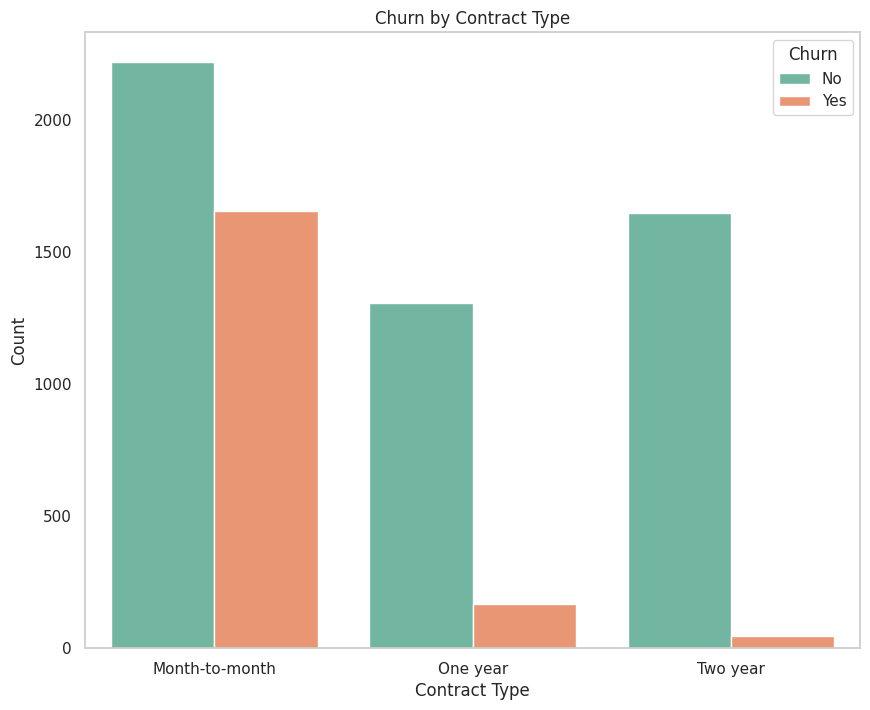

In [10]:
# Churn count by contract type
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Analysis:** In this chart, we present the visualization of churn distribution, considering different types of customer contracts over the years, including one-year, two-year, or three-year subscriptions. With this detailed analysis, we can observe how churn varies according to the type and duration of the contract. This differentiation allows us to better understand customer behavior concerning loyalty over time and identify specific churn patterns in each contract category. 

Moreover, this analysis can be extended to include other factors, such as demographic characteristics, service usage patterns, and interaction history with the company. By incorporating this additional information, our goal is to develop more accurate and robust machine learning models capable of predicting churn with greater accuracy. These models will provide strategic insights to improve customer retention and drive business growth.

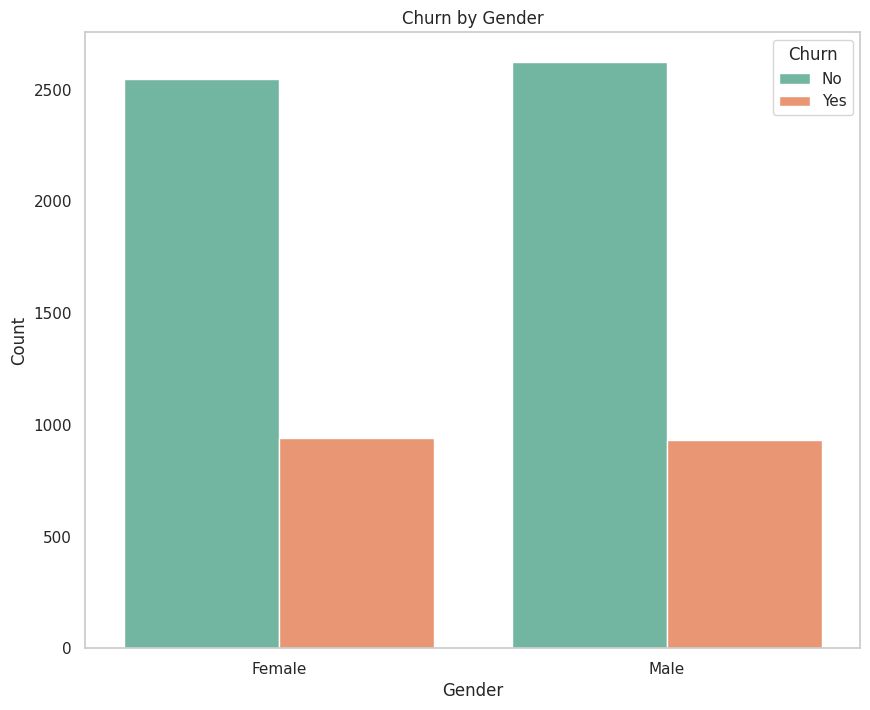

In [11]:
# Churn count by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Analysis:** In this graph, we analyze the distribution of churn based on the gender of internet plan subscribers. By incorporating this gender dimension into the analysis, we seek to understand how churn varies across different genders of customers. This approach allows us to identify potential disparities in churn across demographic groups and better understand the specific needs and behaviors of each gender segment. Additionally, we can explore how factors such as age, geographic location, and socioeconomic profile interact with gender to influence churn. By integrating this additional information, we aim to improve the accuracy of machine learning models in predicting churn and generate more robust insights for personalized and effective customer retention strategies.

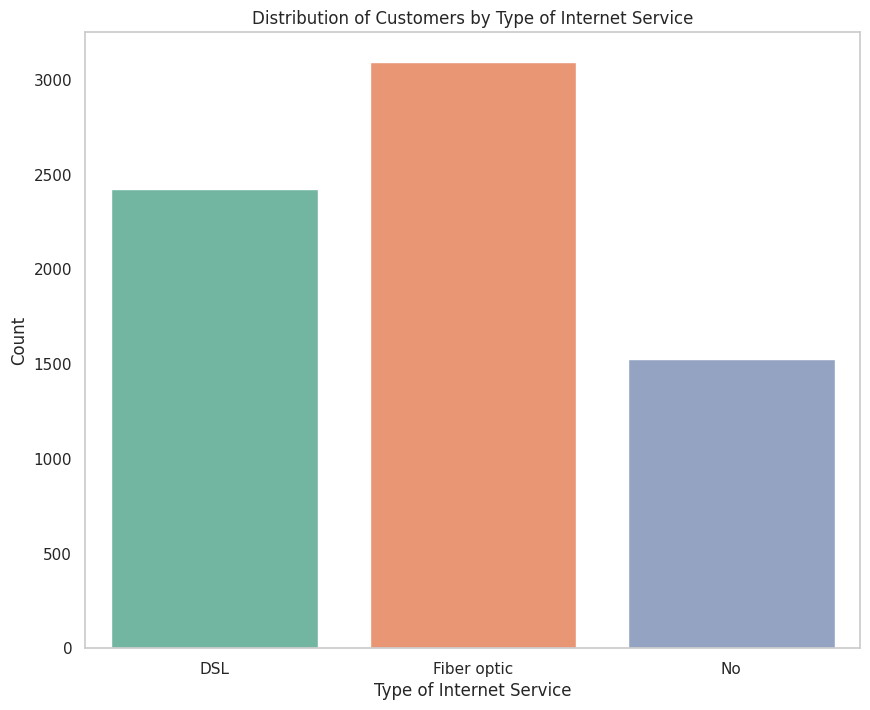

In [12]:
# Distribution of customers by type of internet service
plt.figure(figsize=(10, 8))
sns.countplot(x='InternetService', data=data, palette='Set2')
plt.title('Distribution of Customers by Type of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Analysis:** Here, in this graph, we present a detailed distribution of customers according to the type of service contracted with the operator. A careful analysis reveals that Fiber Optic plans dominate the preference of subscribers compared to other internet access technologies, such as DSL, an older technology based on metal cables, or telephone connection. This observation clearly indicates a significant inclination of consumers towards Fiber Optic contracts. We can further explore this trend by investigating factors such as connection speed, service stability and geographic availability to better understand the reasons behind this preference. By incorporating this additional information, we can improve our understanding of customer behavior and develop more effective marketing and service offering strategies to meet market demands.

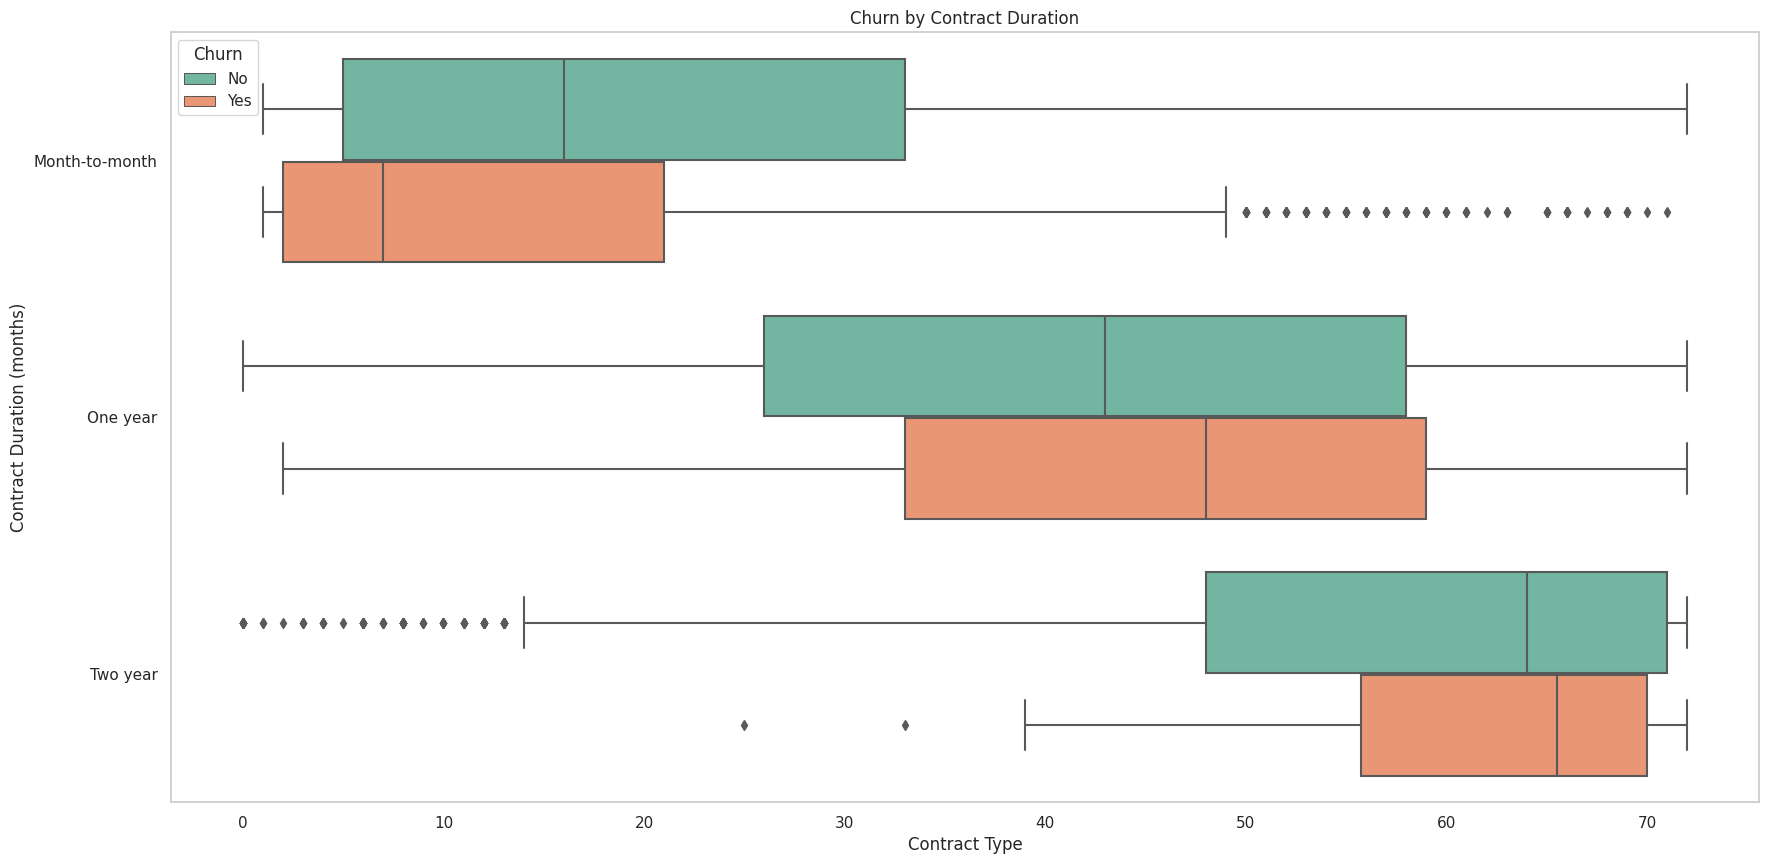

In [13]:
# Churn distribution by contract duration
plt.figure(figsize=(20.5, 10))

sns.boxplot(x='tenure', y='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Duration')
plt.xlabel('Contract Type')
plt.ylabel('Contract Duration (months)')
plt.grid("off")
plt.grid(False)
plt.show()

**Analysis:** This boxplot provides a visual representation of the length of internet plans over the years. Through this analysis, we can not only observe the distribution of plan lengths, but also identify trends over time. Additionally, the boxplot allows us to visualize measures of dispersion, such as quartiles and outliers, providing additional insights into the stability and variability of plan lengths. For example, we can explore whether there is an increasing or decreasing trend in the average plan length over the years, as well as identify seasonal patterns or renewal cycles. By incorporating demographic data such as age, income, and geographic location of subscribers, we can further segment this analysis to better understand the preferences and behaviors of different customer groups. With a deeper understanding of the length of internet plans, we can optimize pricing, promotion, and customer retention strategies to drive growth and customer satisfaction."

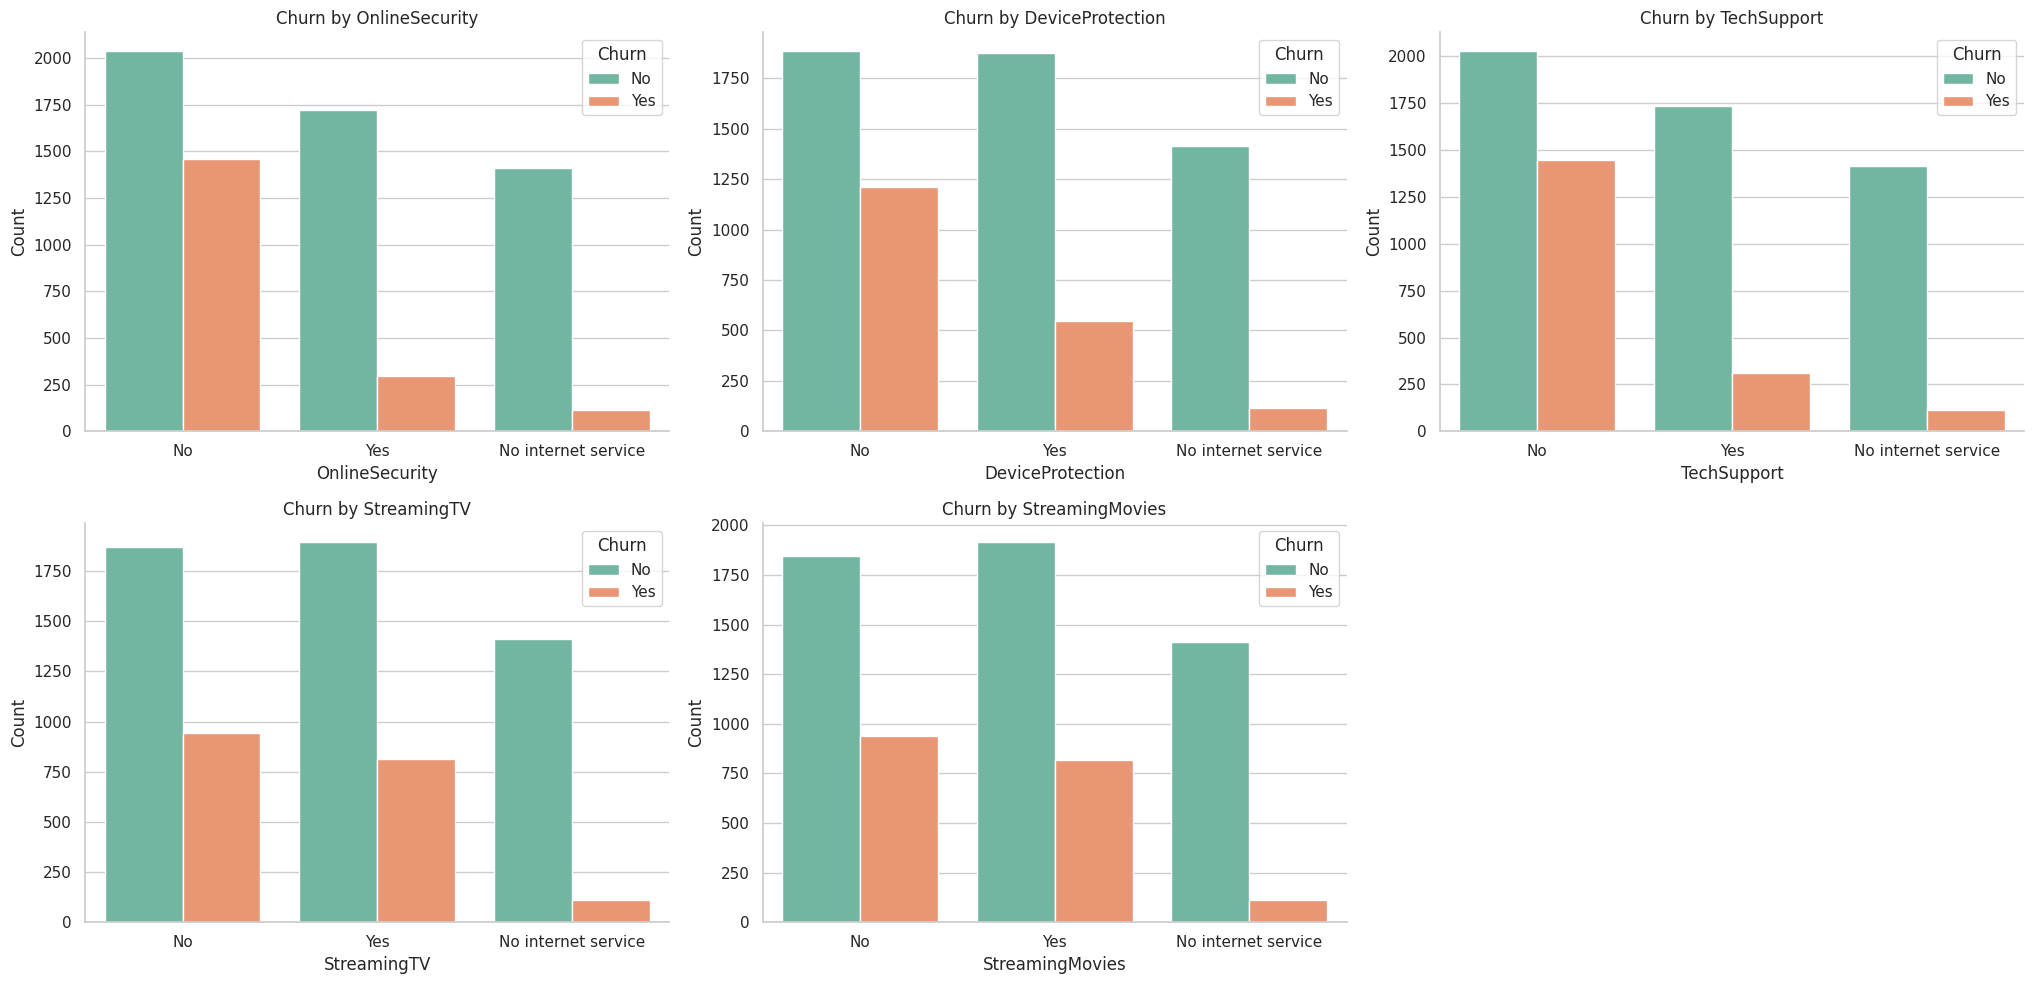

In [14]:
# Churn count by additional services
additional_services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20.5, 10))
for i, service in enumerate(additional_services, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=service, hue='Churn', data=data, palette='Set2')
    plt.title(f'Churn by {service}')
    plt.xlabel(service)
    plt.ylabel('Count')
    sns.despine() # Remove background lines
    plt.tight_layout()
plt.show()

**Analysis:** This chart shows the churn count for different add-on services offered by the operator. Each subplot shows the churn count for a specific add-on service, such as OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. For each add-on service, the chart shows two distinct bars, one for customers who canceled the service (Churn) and one for customers who stayed with the service (Non-Churn). This allows a visual comparison of the proportion of customers who canceled the service versus those who stayed, helping to identify which add-ons may have a stronger correlation with churn. For example, if the blue bar (representing churn) is significantly higher than the orange bar (representing non-churn) for a given add-on service, this suggests that that service may be associated with a higher rate of customer churn. Conversely, if the orange bar is higher, this indicates that the add-on service may be contributing to customer retention.

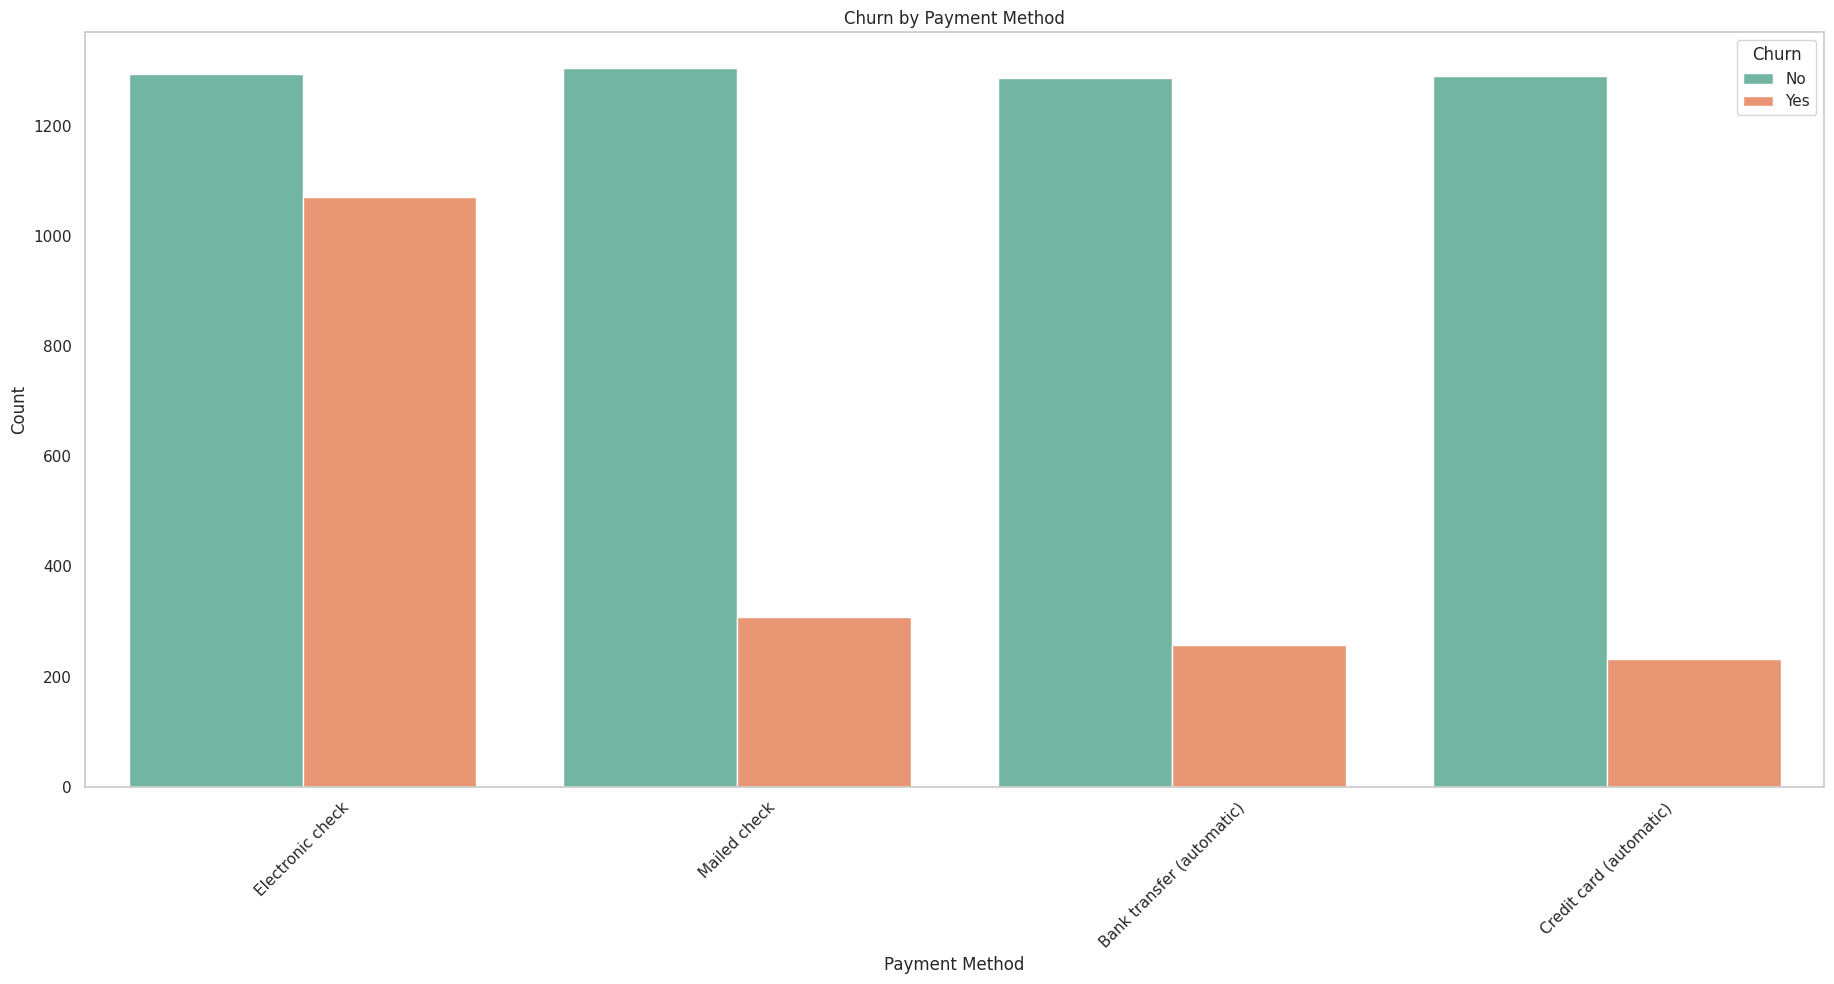

In [15]:
# Churn count by payment method
plt.figure(figsize=(18.5, 10))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

**Analysis:** In this bar chart, we present payments made by subscribers, segmented according to churn. Each bar represents a specific payment category, while the colors differentiate between customers who canceled the service (Churn) and those who remained (Non-Churn). In addition, it is possible to enrich this visualization by including information on the distribution of payments over time or by subscription type. This would allow us to identify payment patterns associated with churn and better understand how different billing strategies can impact customer retention. For example, we can investigate whether there are significant differences in payment patterns between customers who canceled and those who remained, and whether certain payment methods are more strongly correlated with churn. By understanding these nuances, we can adjust billing strategies to improve customer retention and, consequently, the financial health of the company.

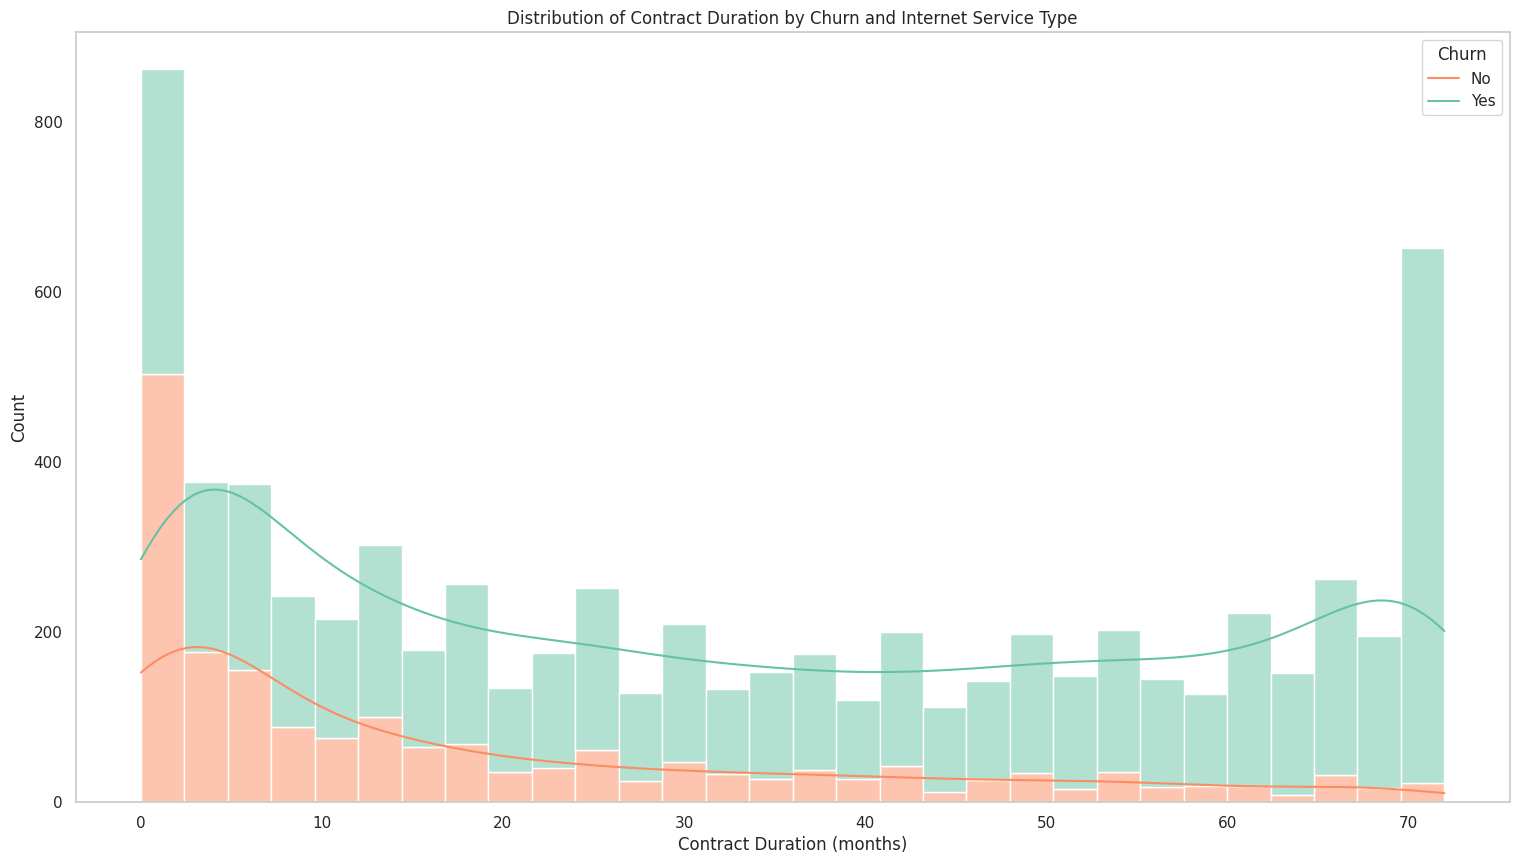

In [16]:
plt.figure(figsize=(18.5, 10))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, multiple='stack', palette='Set2', bins=30)
plt.title('Distribution of Contract Duration by Churn and Internet Service Type')
plt.xlabel('Contract Duration (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

**Analysis:** In this indicator, we present an analysis of the distribution of service contracts offered by the internet operator, focusing on the duration of the contracts, specifically between two-year and one-year contracts. Through this visualization, we seek to understand subscribers’ preferences regarding contract duration and identify patterns of behavior that may influence churn. In addition, we can deepen our analysis by considering other variables, such as the type of service contracted, the geographic location of subscribers, and payment history. This will allow us to better understand the motivations behind customers’ choices of contract duration and how these choices may impact their loyalty to the operator. 

For example, we can investigate whether there are significant differences in the distribution of two-year and one-year contracts among different demographic segments, such as age or income range. This more detailed analysis will help us adapt our pricing and customer retention strategies to meet the specific needs and preferences of each group of subscribers, thus promoting greater satisfaction and brand loyalty.

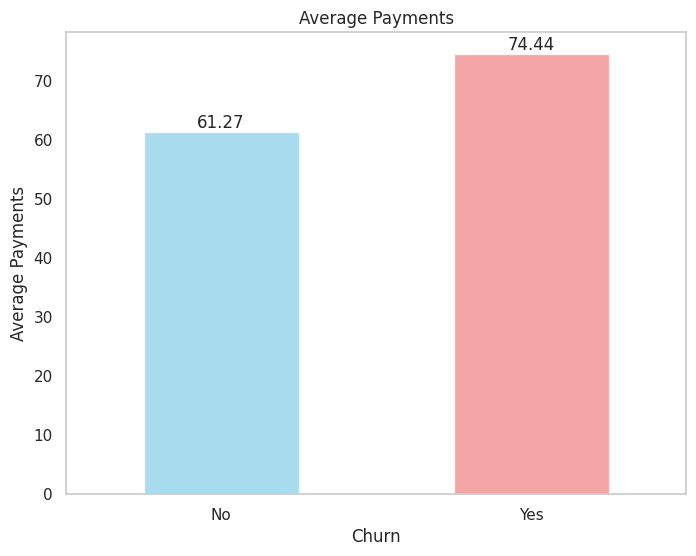

In [17]:
# Calculating the average monthly charges by churn
media_pagamentos = data.groupby('Churn')['MonthlyCharges'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
media_pagamentos.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)

# Customizing the chart
plt.title('Average Payments')
plt.xlabel('Churn')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the average values on the bars
for i in range(len(media_pagamentos)):
    plt.text(i, media_pagamentos.iloc[i], f"{media_pagamentos.iloc[i]:.2f}", ha='center', va='bottom')
plt.grid(False)
plt.show()

**Analysis:** In this other indicator, we present the average number of payments made by internet subscribers, representing a total of 74.44% of payments made. This metric is crucial to assess the financial health of the operator and its ability to maintain stable revenue over time.
In addition to considering the average number of payments, we can deepen our analysis by examining the distribution of payments over time and by type of service contracted. This will allow us to identify patterns of payment behavior among subscribers and better understand the factors that influence the punctuality of payments.
For example, we can investigate whether there are differences in the payment rate between different demographic segments, such as age or geographic location. In addition, we can analyze whether certain additional services, such as video streaming or technical support, have an impact on the punctuality of payments.
By understanding these behavior patterns, we can develop more effective collection and communication strategies with subscribers, aiming to increase the payment rate and, consequently, improve the financial health of the operator.

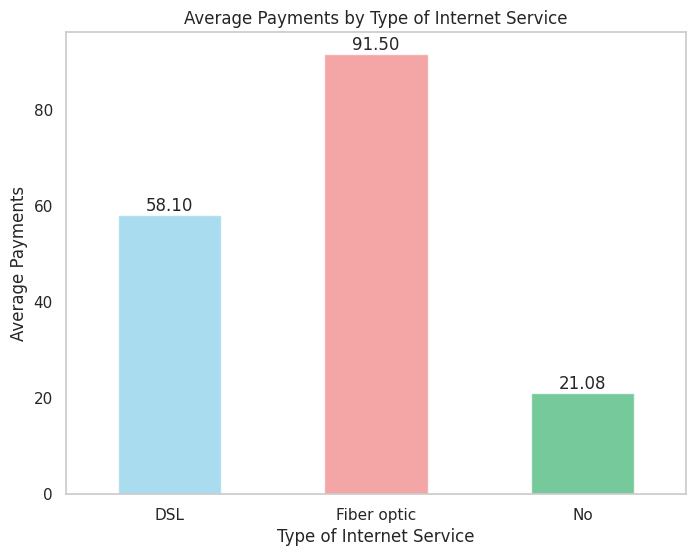

In [18]:
# Calculating the average monthly charges by type of Internet service
media_pagamento_por_internet = data.groupby('InternetService')['MonthlyCharges'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
media_pagamento_por_internet.plot(kind='bar', color=['skyblue', 'lightcoral', 'mediumseagreen'], alpha=0.7)

# Customizing the chart
plt.title('Average Payments by Type of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the average values on the bars
for i in range(len(media_pagamento_por_internet)):
    plt.text(i, media_pagamento_por_internet.iloc[i], 
             f"{media_pagamento_por_internet.iloc[i]:.2f}", 
             ha='center', 
             va='bottom')

plt.grid(False)
plt.show()

**Analysis:** In this other indicator, we present the average payment by type of internet service. This analysis allows us to understand how the different services contracted by subscribers impact payment patterns. In addition to considering the average payment, we can explore the variability in payments between the different types of service. For example, we can investigate whether subscribers to additional services, such as video streaming or technical support, have a higher average payment compared to subscribers to basic internet plans. In addition, we can examine whether the average payment varies according to the connection speed or other specific characteristics of the service. This will help us identify which services have the greatest perceived value for subscribers and are most strongly associated with customer loyalty and satisfaction. By understanding these patterns, we can direct our efforts to optimize the service offering and develop personalized pricing and customer retention strategies, aiming to maximize revenue and customer satisfaction.

<Figure size 2500x1000 with 0 Axes>

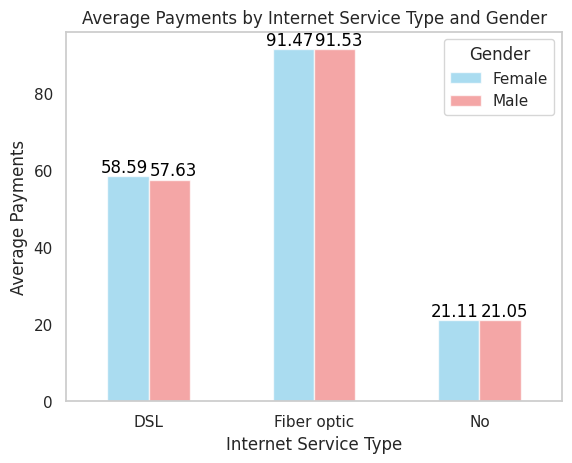

In [19]:
# Calculating the average monthly charges by Internet service type and gender
media_pagamento_por_internet_genero = data.groupby(['InternetService', 'gender'])['MonthlyCharges'].mean().unstack()

# Plotting the bar chart
plt.figure(figsize=(25, 10))
media_pagamento_por_internet_genero.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)

# Customizing the chart
plt.title('Average Payments by Internet Service Type and Gender')
plt.xlabel('Internet Service Type')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')

# Displaying the average values ​​on the bars
for i in range(len(media_pagamento_por_internet_genero)):
    plt.text(i-0.15, media_pagamento_por_internet_genero.iloc[i, 0], 
             f"{media_pagamento_por_internet_genero.iloc[i, 0]:.2f}", ha='center', va='bottom', color='black')
    plt.text(i+0.15, media_pagamento_por_internet_genero.iloc[i, 1], 
             f"{media_pagamento_por_internet_genero.iloc[i, 1]:.2f}", ha='center', va='bottom', color='black')

plt.grid(False)
plt.show()

**Analysis:** In this other indicator, we present the average payment by gender among subscribers to internet contracts, with a focus on fiber optic plans. We observe that, on average, male subscribers tend to make higher payments compared to female subscribers for this specific type of service. In addition to considering the average payment, we can investigate other demographic variables that may influence payment patterns between different genders. For example, we can analyze whether the difference in average payment between men and women persists across different age groups or geographic regions. 

In addition, we can explore whether this difference in average payment is related to differences in the use or perception of internet service between genders. For example, we can investigate whether men tend to purchase more additional services or higher-speed plans, which may influence the average payment. By understanding these patterns and underlying determinants, we can customize our marketing and communication strategies to meet the specific needs of each gender segment, aiming to increase customer satisfaction and internet operator revenue.

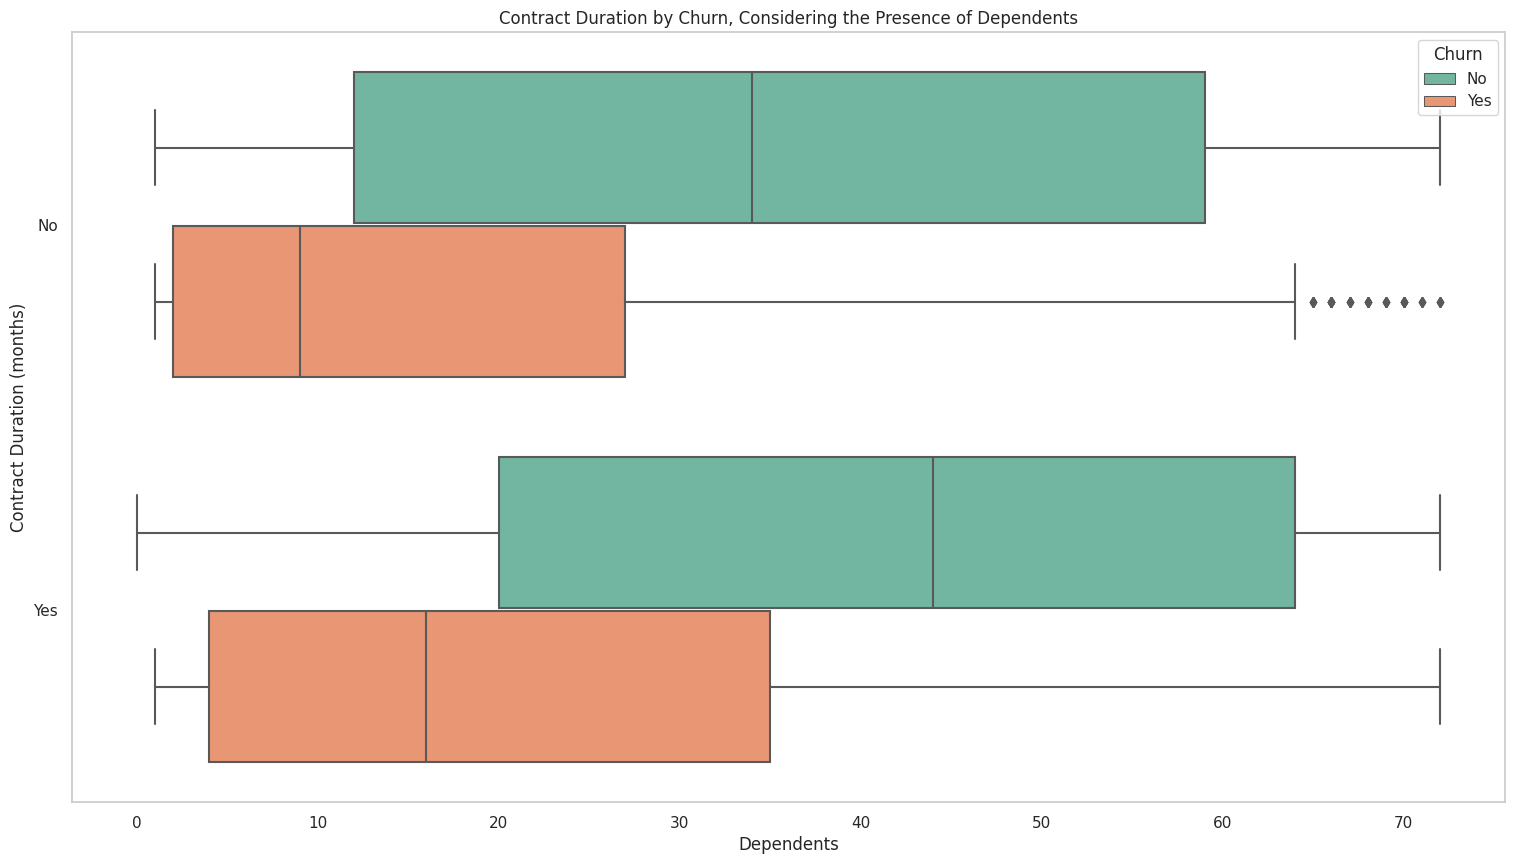

In [20]:
plt.figure(figsize=(18.5, 10)) 
sns.boxplot(data=data, x='tenure', y='Dependents', hue='Churn', palette='Set2')
plt.title('Contract Duration by Churn, Considering the Presence of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Contract Duration (months)')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

**Analysis:** In this other indicator, we analyze internet plans that include dependents, with a specific focus on dependents over 30 years of age. This analysis allows us to better understand the needs and preferences of subscribers who share their internet plans with family members or other household members.
In addition to identifying the presence of dependents over 30 years of age in internet plans, we can explore other demographic characteristics of these dependents, such as exact age range, gender, geographic location and service usage patterns. This will help us to more effectively segment our target audience and customize our offers and communication strategies to meet the specific needs of this demographic group. We can also investigate whether the presence of older dependents in internet plans is associated with different consumption patterns, such as a demand for specific additional services, a greater need for technical support or a preference for plans with higher connection speeds. This information is essential to adapt our service offering and improve customer satisfaction among subscribers who share their internet plans with dependents.

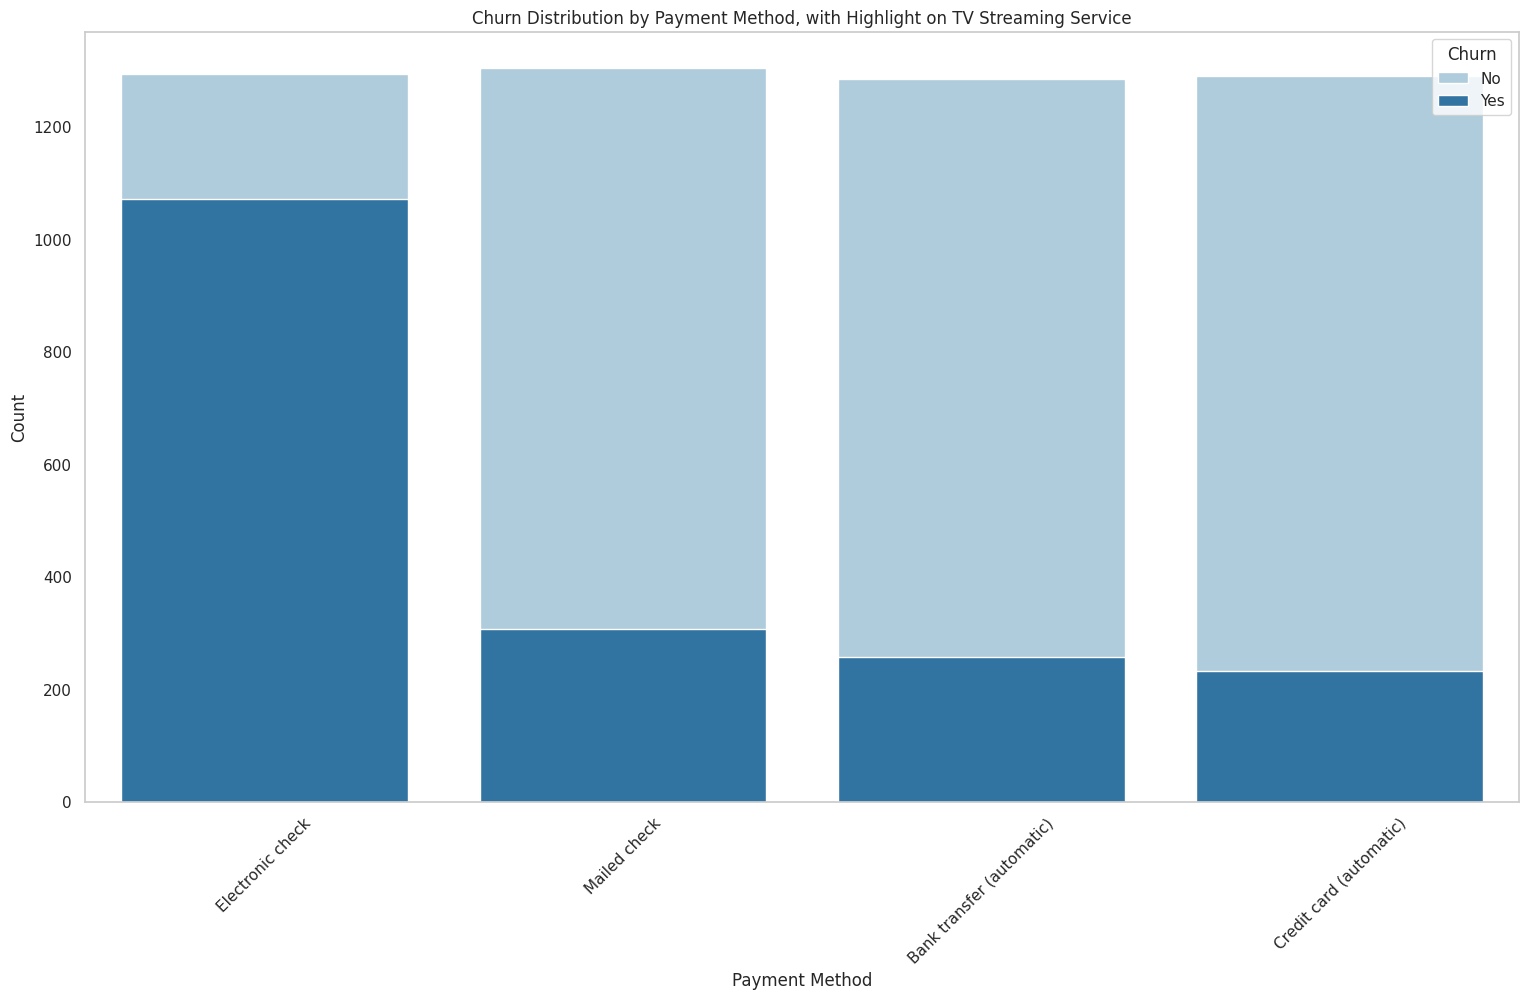

In [21]:
plt.figure(figsize=(18.5, 10))

# Churn count by payment method
sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette='Paired', hue_order=['No', 'Yes'], dodge=False)

plt.title('Churn Distribution by Payment Method, with Highlight on TV Streaming Service')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

**Analysis:** In this indicator, we explore the streaming services offered by the operator, highlighting the payment preferences of subscribers. We observe that the ‘Electronic Check’ payment method receives the highest rating compared to other payment methods available. To gain a more comprehensive understanding of these payment preferences, we could examine other variables, such as the distribution of payments over time and by type of streaming service. This would allow us to identify seasonal patterns or specific payment trends for each streaming service offered. In addition, we could investigate whether the preference for the ‘Electronic Check’ payment method is related to demographic characteristics of subscribers, such as age, income or geographic location. This would help us better understand the profile of subscribers who opt for this payment method and adapt our billing and communication strategies to meet their specific needs and preferences. By understanding these payment patterns, we can optimize our streaming service offerings and develop personalized billing and customer retention strategies, aiming to increase customer satisfaction and drive business growth.

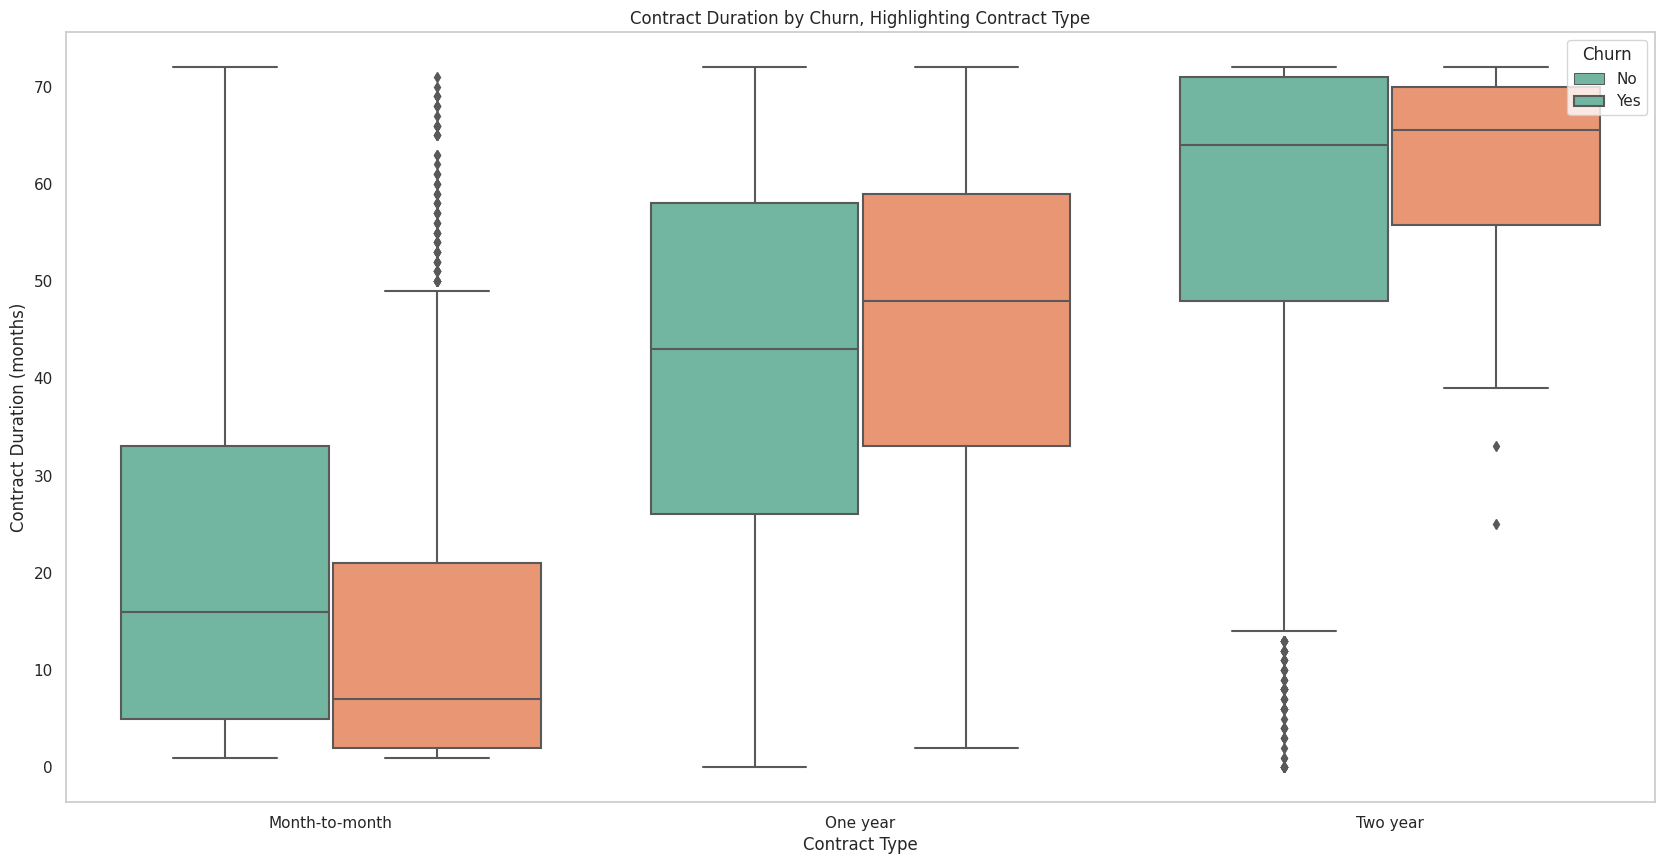

In [22]:
plt.figure(figsize=(20.5, 10))

# Boxplot of contract duration by churn and contract type
sns.boxplot(data=data, x='Contract', y='tenure', hue='Churn', palette='Set2')

# Customizing the chart
plt.title('Contract Duration by Churn, Highlighting Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Contract Duration (months)')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

**Analysis:** In this indicator, we analyze contract lengths in months, providing valuable insights into the average length of time subscribers commit to the operator’s services. Understanding typical contract lengths allows us to assess customer stability and loyalty over time. In addition to considering average contract lengths, we can explore the distribution of contracts across different time periods. For example, we can investigate whether there are significant differences in contract lengths between different types of services, such as internet plans, streaming services, or additional services such as technical support. In addition, we can analyze whether contract lengths vary based on subscriber demographics, such as age, income, or geographic location. This analysis will help us better understand customer behavior patterns and tailor our pricing, retention, and customer loyalty strategies to meet their specific needs and preferences. By understanding these contract length patterns, we can develop more effective strategies to increase customer retention, improve customer satisfaction, and drive business growth.

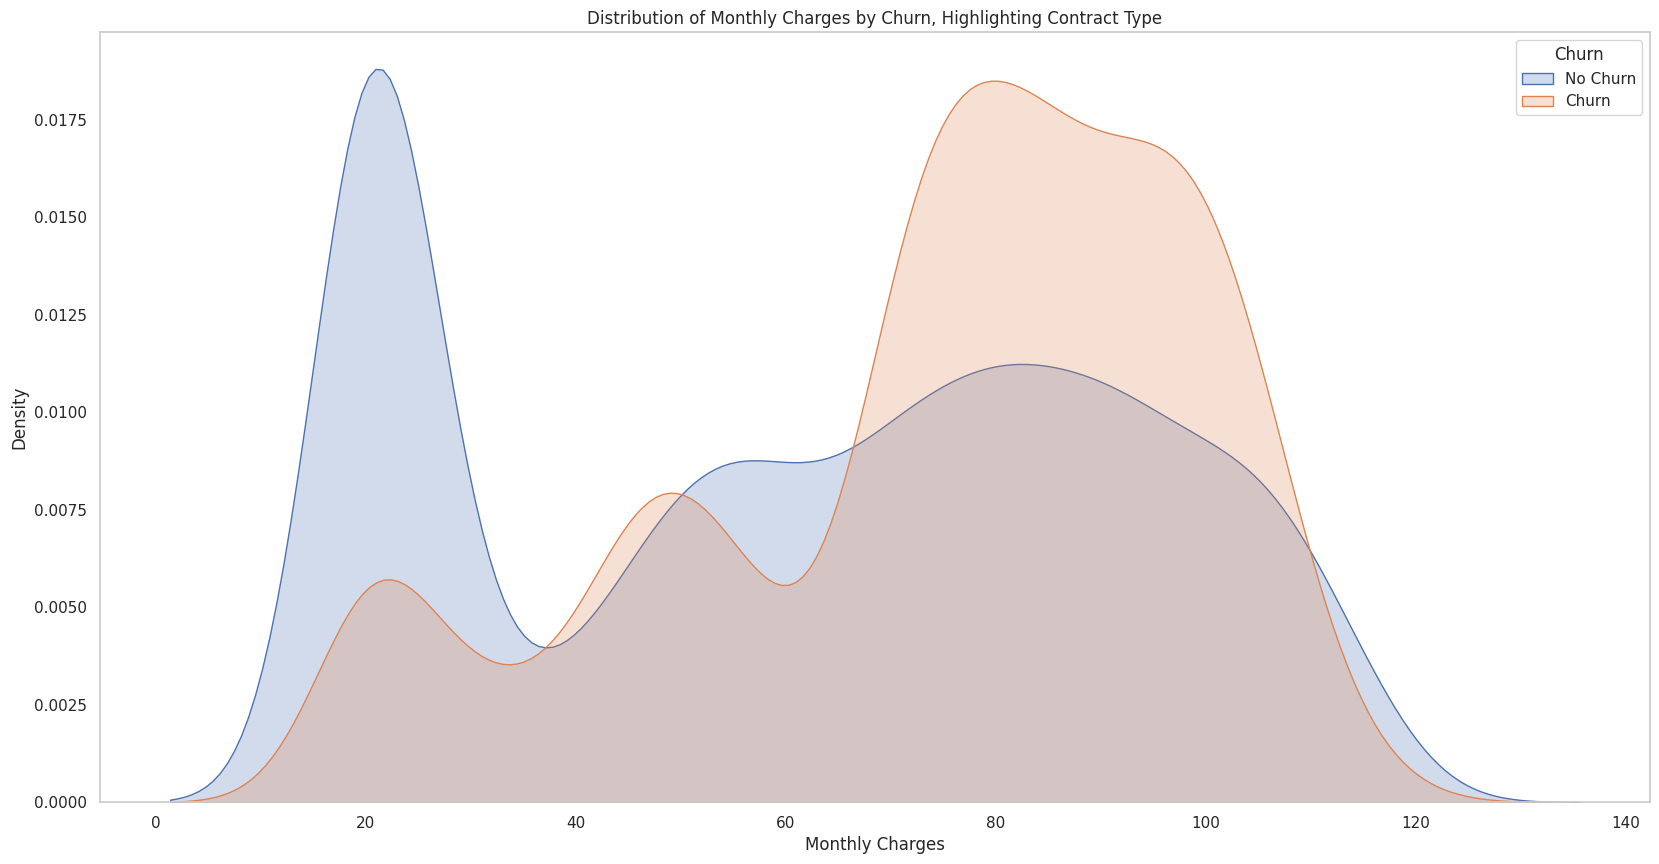

In [23]:
plt.figure(figsize=(20, 10))

# Density chart of monthly charges by churn and contract type
sns.kdeplot(data=data[data['Churn'] == 'No']['MonthlyCharges'], label='No Churn', shade=True)
sns.kdeplot(data=data[data['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', shade=True)

# Customizing the chart
plt.title('Distribution of Monthly Charges by Churn, Highlighting Contract Type')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.grid(False)

plt.show()

**Analysis:** In this graph, we present a distribution of monthly charges in relation to churn, segmented by the different types of internet contract. This visualization provides valuable insights into how monthly charges vary according to churn, allowing a deeper understanding of the impact of different contract types on the operator's revenue. In addition to considering the distribution of monthly charges, we can explore other variables, such as the distribution of charges over time and by type of service contracted. This would help us identify seasonal trends or consumption patterns specific to each type of internet contract. We can also investigate whether the relationship between monthly charges and churn is influenced by demographic characteristics of subscribers, such as age, income or geographic location. This would help us better understand the factors that contribute to churn and develop more effective strategies to reduce it and increase the operator's revenue. By understanding these underlying patterns and determinants, we can optimize our pricing, retention and customer loyalty strategies to improve customer satisfaction and drive business growth.

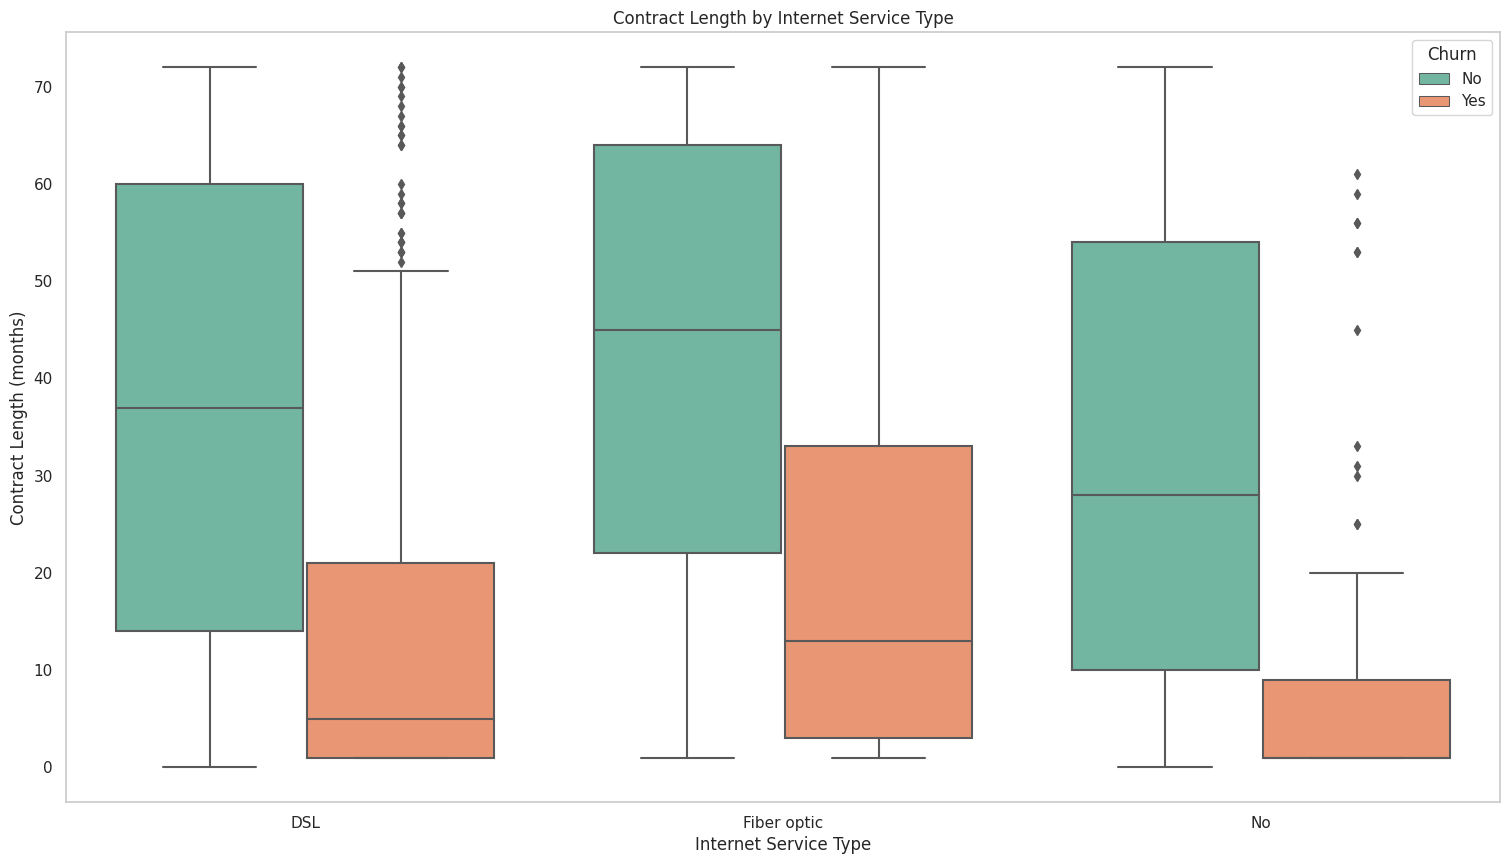

In [24]:
plt.figure(figsize=(18.5, 10))

# Boxplot of contract length by internet service type, colored by churn
sns.boxplot(data=data, x='InternetService', y='tenure', hue='Churn', palette='Set2')

# Customizing the chart
plt.title('Contract Length by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Contract Length (months)')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

**Analysis:** In this chart, which represents the different types of internet contracts, we can see that the maximum length of fiber optic service contracts is 35 months. This observation highlights subscribers’ preference for long-term commitments over high-speed and reliable services, such as fiber optics. In addition to highlighting the maximum length of fiber optic contracts, we can explore other characteristics of the different types of internet contracts. For example, we can analyze the distribution of contract lengths over time and by type of service contracted, which would allow us to identify trends or patterns in subscriber behavior. 

We can also investigate whether contract lengths vary according to subscriber demographic characteristics, such as age, income, or geographic location. This would help us better understand customer preferences and needs and adapt our pricing and customer retention strategies to meet their expectations.
By understanding these underlying patterns and drivers, we can develop more effective strategies to increase customer satisfaction, reduce churn, and drive sustainable business growth.

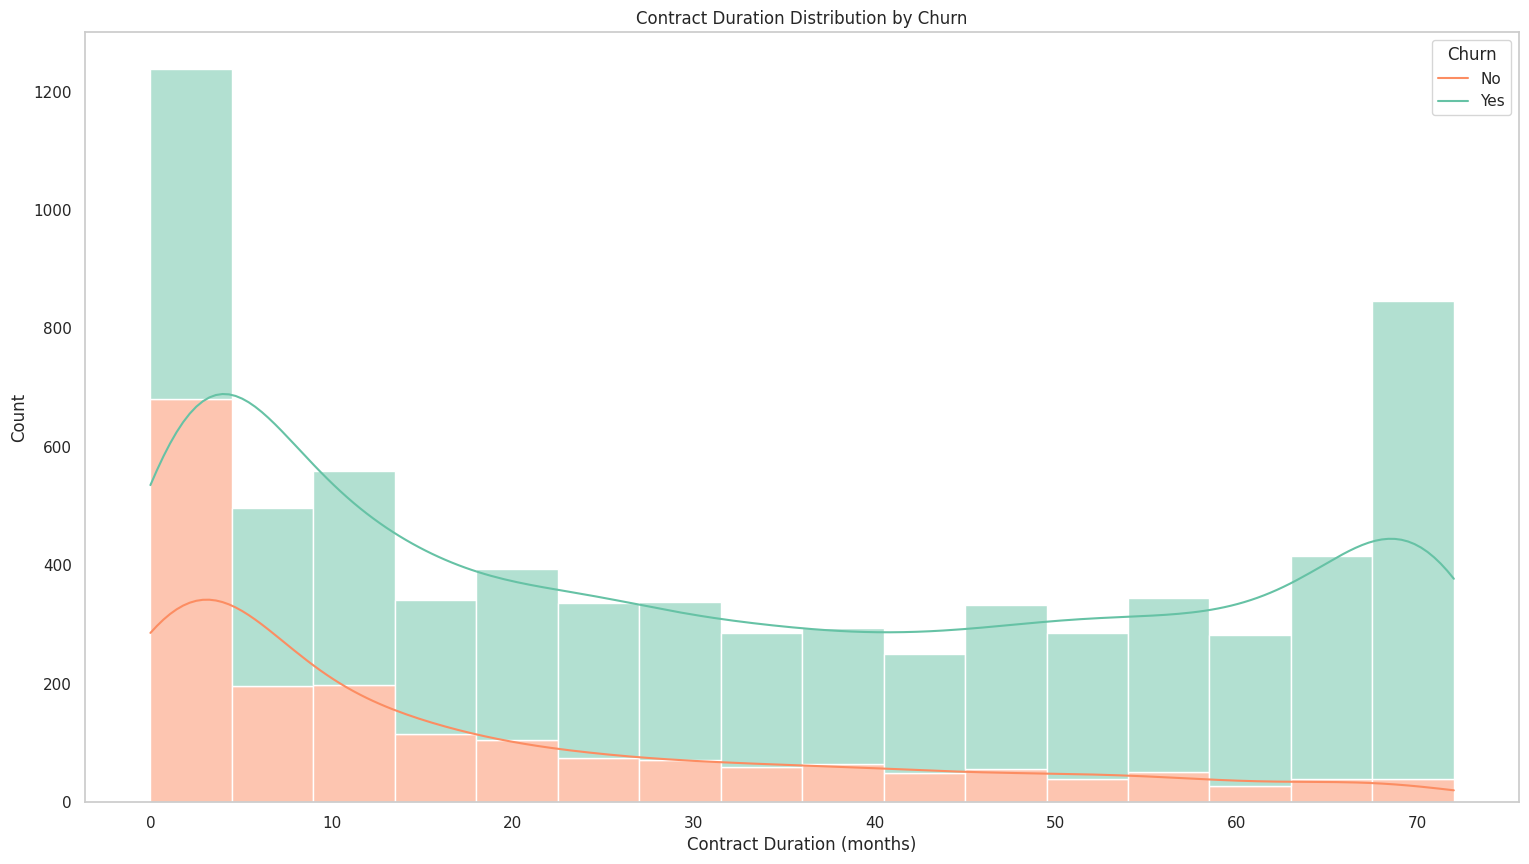

In [25]:
plt.figure(figsize=(18.5, 10))

# Histogram of contract duration for churned and non-churned customers
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', palette='Set2', kde=True)

# Customizing the chart
plt.title('Contract Duration Distribution by Churn')
plt.xlabel('Contract Duration (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

**Analysis:** In this indicator, in addition to analyzing the average contract length in months, we also examine how this length varies by type of internet service. This analysis allows us to better understand subscribers’ preferences regarding contract length, according to the specific characteristics of each type of service. In addition to considering the average contract length, we can explore the distribution of contract lengths over time and by type of service contracted. This would help us identify whether there are significant differences in contract lengths between basic internet services and additional services, such as video streaming or technical support. We can also investigate whether contract lengths vary according to subscriber demographic characteristics, such as age, income or geographic location. This would help us better understand customers’ preferences and needs and adapt our pricing and customer retention strategies to meet their specific expectations. By understanding these underlying patterns and determinants, we can develop more effective strategies to increase customer satisfaction, reduce churn and drive sustainable business growth.

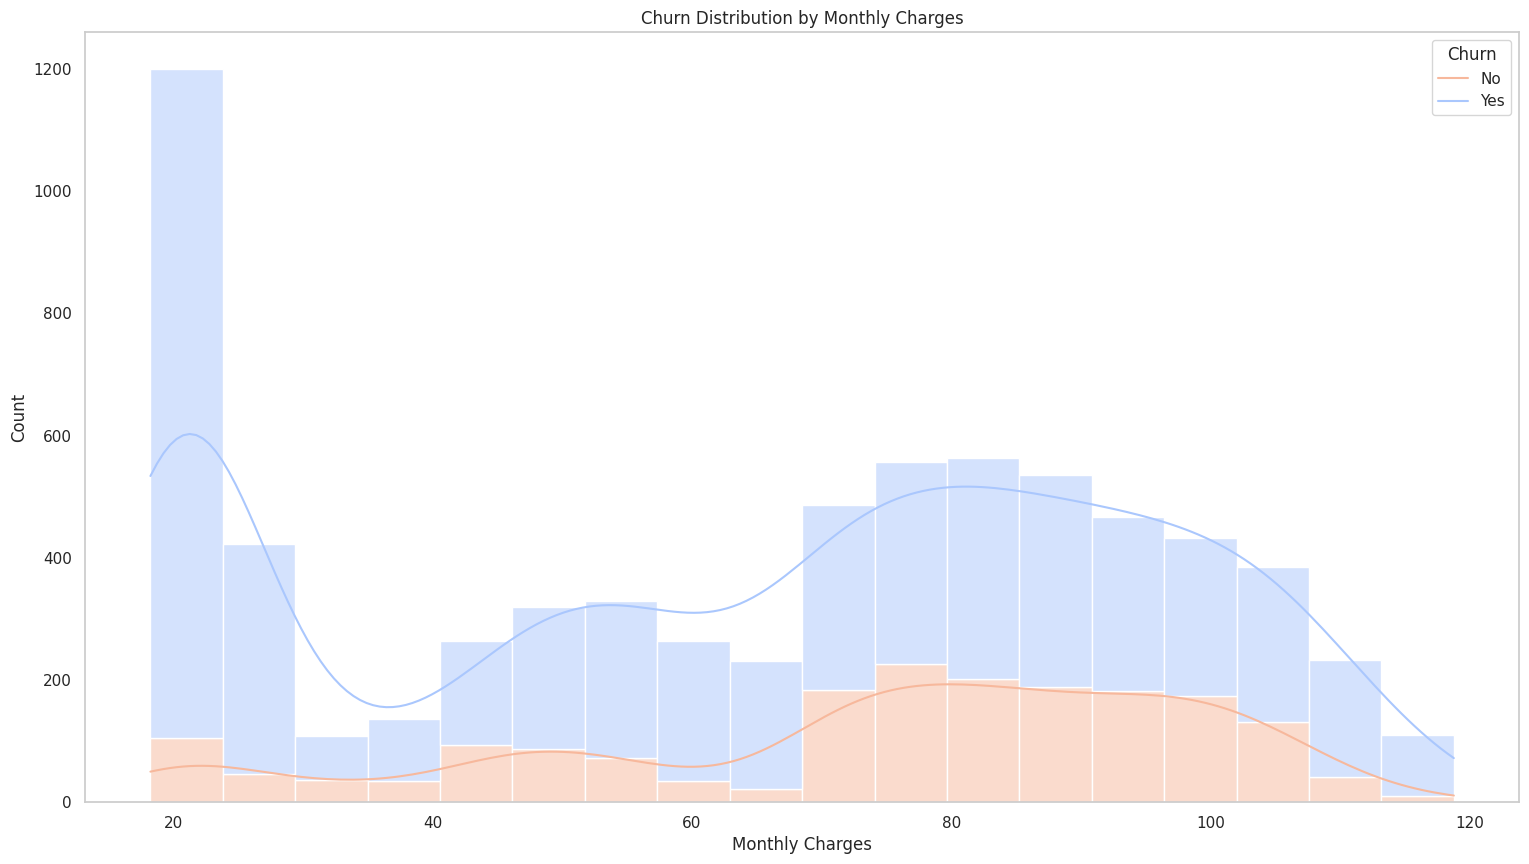

In [26]:
plt.figure(figsize=(18.5, 10))

# Histogram of monthly charges distribution by churn
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='coolwarm', kde=True)

# Customizing the chart
plt.title('Churn Distribution by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

**Analysis:** In this other chart, we present an analysis of internet contracts in terms of monthly charges, highlighting the internet plan worth 1,200. We note that this plan stands out in terms of monthly charges, suggesting a possible preference of subscribers for this specific package of services. In addition to highlighting the 1,200 internet plan, we can explore other characteristics of the different internet plans offered by the operator. For example, we can analyze the distribution of monthly charges for different price ranges of internet plans, which would allow us to identify consumption patterns and preferences of subscribers. We can also investigate whether the preference for certain internet plans is related to demographic characteristics of subscribers, such as age, income or geographic location. This would help us better understand the needs and expectations of customers and adapt our internet plan offerings to meet their specific demands. By understanding these patterns and underlying determinants, we can develop more effective strategies to promote the most popular internet plans, increase customer satisfaction and drive business growth.

## 2.1) EAD Conclusion

In this comprehensive data analysis, we explored a variety of key metrics related to the internet services offered by the operator, including plan types, subscriber demographics, and subscription patterns. The insights gained provide a detailed view of customer preferences and behaviors, highlighting areas of opportunity and guiding future strategies. First, we observed a clear preference among customers for fiber-optic internet plans compared to DSL plans, which represent an older technology with slower internet speeds. This preference for fiber-optic suggests a growing demand for faster and more reliable internet speeds, possibly driven by increased consumption of streaming content, online gaming, and other high-bandwidth activities. In addition, we identified the target variable for a potential machine learning model: the binary variable indicating whether a customer canceled (1) or did not cancel (0) the service. This variable is crucial for predicting churn, that is, anticipating whether a customer is likely to cancel the service in the future. The ability to predict churn allows operators to take proactive measures to retain customers, improve user experience and ensure business sustainability.

During the analysis, we also highlighted the importance of extracting meaningful insights into customer preferences regarding internet plans. We observed that customers tend to look for plans with higher internet speeds, whether for entertainment activities such as watching streaming TV or for more practical purposes such as remote work and online education. The speeds offered by fiber optics, in turn, demonstrated stronger adoption compared to slower technologies such as DSL, ADSL and Cable.

We therefore conclude that this data analysis is essential to guide the operator's business strategies. The insights obtained allow a deeper understanding of customers' needs and preferences, enabling the development of internet plans that are more aligned with their expectations. In addition, the ability to predict churn through machine learning models offers a unique opportunity for operators to act proactively in retaining customers and maximizing user satisfaction. Ultimately, this data-driven approach is essential to driving sustainable business growth and ensuring your competitiveness in the ever-evolving marketplace.

# Part 3 - Data cleaning

In [27]:
# Deleting columns
data.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [28]:
# Checking for blank data
blank_data = data.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


In [29]:
# Checking for NaN data
nan_data_by_column = data.isna().sum()
nan_total_data = data.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

Total NaN data in DataFrame: 0


In [30]:
# Checking for missing data
missing_data = data.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
# Print the total number of missing values in the entire DataFrame.
total_missing = data.isnull().sum().sum() 
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


# Part 4 - Feature engineering

**Definition - Feature engineering**

- 1.Feature Engineering

Feature engineering is a crucial step in the data preparation process in data science and machine learning. It involves the creation or transformation of variables (also known as features) to improve the performance of machine learning models. Good feature engineering can increase model accuracy, reduce overfitting, and consequently generate more meaningful insights from the data. There are various feature engineering techniques, including creating new features from existing ones, data normalization, handling missing values, and converting categorical variables into numerical ones, among others. Each technique is applied according to the nature of the data and the requirements of the problem at hand.

- 2.Label Encoder

Label Encoding is a commonly used technique to convert categorical variables into numerical ones. In many datasets, it's common to find categorical variables that represent textual categories, such as "high," "medium," and "low," or "yes" and "no." However, most machine learning algorithms only accept numerical inputs. Therefore, it is necessary to convert these categorical variables into numbers before feeding them into the models. Label Encoder assigns a unique value to each category present in the categorical variable. For example, if we have a variable called "Size" with categories "Small," "Medium," and "Large," the Label Encoder might assign the values 0, 1, and 2, respectively, to these categories. In this way, the categories are represented by integers, making them suitable for analysis by machine learning algorithms. It is important to mention that Label Encoder is more appropriate for ordinal categorical variables, where there is an intrinsic order between the categories. For nominal categorical variables, where there is no such order, other techniques such as One-Hot Encoding may be more suitable.

In summary, feature engineering, along with techniques like Label Encoder, plays a fundamental role in preparing data for analysis and modeling in data science and machine learning. These techniques allow the data to be properly processed by machine learning algorithms, contributing to the construction of more accurate and effective models.

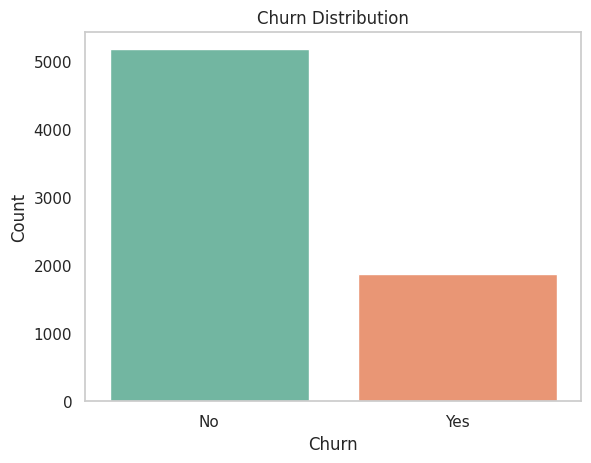

In [32]:
# Checking the target column with plot
sns.countplot(x="Churn", data=data, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Analysis:** Here is a visualization chart of the churn distribution, which is our main target variable for the machine learning model. Churn, which represents the customer churn rate, is a crucial indicator for companies in various industries. This chart provides a detailed visual representation of the churn distribution over time or across different customer segments, allowing for deeper analysis of patterns and trends. Additionally, this visualization can be enriched with additional information, such as demographic, behavioral, or purchase history data, for a more complete understanding of the factors that influence churn. Using this visual analysis as a basis, our goal is to develop and optimize machine learning models capable of predicting and mitigating churn, providing valuable insights for customer retention strategies and business decision-making.

In [33]:
from sklearn.preprocessing import LabelEncoder 

# Creating the Label encoder 
Label_pre = LabelEncoder() 
data_cols=data.select_dtypes(exclude=['int','float']).columns 
label_col =list(data_cols) 

# Applying encoder 
data[label_col]= data[label_col].apply(lambda col:Label_pre.fit_transform(col)) 

# Saved dataset with Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

# Viewing 
Label_pre

LabelEncoder()

In [34]:
# Viewing
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


# Part 5 - Training and test division

In [35]:
# Split the data into features (X) and target (y)
X = data.drop("Churn", axis=1) # Drop the target column to get the features
y = data["Churn"] # Set the target column

In [36]:
# Visualize rows and column x
X.shape

(7043, 18)

In [37]:
# Visualize rows and column y
X.shape

(7043, 18)

**Data Splitting and the "Churn" Variable**

Another crucial step in data preparation is splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization. Typically, when splitting the data, the predictor variables (also known as features) are separated from the variable of interest, which is what we want to predict. For example, in a churn prediction scenario for a telecommunications company, the variable of interest might be "Churn," indicating whether a customer has canceled the service. In this case, the features would be other customer-related information, such as contract duration, plan type, number of complaints, among others. By splitting the data into training and test sets, we ensure that the model is trained on one part of the data and evaluated on another independent part. This helps to estimate the model's real performance when applied to new data, which is essential for making informed decisions in the real world.

# Part 5 - Model training and testing

In [38]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (5634, 18)
Rows and columns of training data y_train: (5634, 18)


**Model Training and Data Splitting**

A crucial step after data preparation is model training. This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability.

In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing. This division ensures that the model is trained on a substantial amount of data while still having a significant portion for evaluation.

For example, when predicting churn in a telecommunications company, we would split the data into features (such as usage history, plan type, etc.) and the target variable, "Churn." Then, we would apply the train-test split, where 80% of the data is used to train the model and the remaining 20% is used to evaluate its performance.

This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training.

# Part 6 - Machine learning models

**Model Implementation and Data Splitting**

At the fifth stage of the project, I am focused on implementing machine learning models. I am developing eight distinct algorithms for analysis, which include Logistic Regression, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, and LightGBM. This diversity of algorithms allows us to explore different approaches and techniques for the problem at hand. During the training process, we closely monitor the performance of each model, aiming to identify the one that best fits the data and provides the most accurate predictions. This stage is crucial as it allows us to evaluate and compare the performance of each algorithm, thereby selecting the most effective machine learning model for our specific application.

Throughout this stage, I am developing and training eight distinct machine learning algorithms. These algorithms were carefully selected to encompass a wide range of techniques and characteristics, aiming to capture the complexity and nuances of the data:

- **Logistic Regression:** A linear model used for solving binary classification problems.

- **Naive Bayes:** A probabilistic model based on Bayes' theorem, suitable for classification problems with independent features.

- **Decision Tree:** A model that uses a tree structure to represent hierarchical decision rules.

- **Random Forest:** An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness.

- **AdaBoost:** Another ensemble learning algorithm that iteratively adjusts the weights of observations to focus on the most challenging cases.

- **Gradient Boosting:** An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

- **XGBoost:** An efficient implementation of gradient boosting, known for its speed and superior performance.

- **LightGBM:** Another implementation of gradient boosting, designed to train models quickly and with efficient memory usage.

**Training and Evaluation**

Each of these algorithms is being trained and tuned using best practices in machine learning. After training, we evaluate the performance of each model on a validation set, using metrics appropriate to our problem, such as accuracy, recall, F1-score, among others.

**Selection of the Best Model**

At the end of this process, we will compare the performance of all models and select the one that shows the best results according to our evaluation criteria. This choice will be based not only on the performance metric but also on the interpretability of the model, its generalization capability, and its suitability to the problem requirements.

This meticulous and comprehensive approach will allow us to identify the most effective machine learning model to solve our specific problem, providing valuable insights and driving informed decision-making.

In [39]:
# Importing libraries
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm
import matplotlib.pyplot as plt

# Metrics and model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report


# Model dictionary
models = { 
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),
    
    # Naive Bayes model
    "Naive Bayes": GaussianNB(),
       
    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier(),
    
    # Random Forest model
    "Random Forest": RandomForestClassifier(),
    
    # AdaBoost model
    "AdaBoost": AdaBoostClassifier(),
    
    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),
    
    # XGBoost model
    "XGBoost": XGBClassifier(),
    
    # LightGBM model
    "LightGBM": LGBMClassifier()}


# Model training with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Model training
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    
    # Model prediction
    model_pred = model.predict(X_test)

    # Displaying the models
    print()
    tqdm.write(f"Model: {name} has an Accuracy of {score:.2%}")

Training models:  12%|█▎        | 1/8 [00:00<00:00,  9.88it/s]


Model: Logistic Regression has an Accuracy of 81.83%

Model: Naive Bayes has an Accuracy of 75.80%

Model: Decision Tree Classifier has an Accuracy of 71.47%


Training models:  50%|█████     | 4/8 [00:00<00:00,  4.24it/s]


Model: Random Forest has an Accuracy of 79.35%


Training models:  62%|██████▎   | 5/8 [00:01<00:00,  3.98it/s]


Model: AdaBoost has an Accuracy of 79.91%


Training models:  88%|████████▊ | 7/8 [00:02<00:00,  3.10it/s]


Model: Gradient Boosting has an Accuracy of 81.05%

Model: XGBoost has an Accuracy of 78.21%
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


Training models: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]


Model: LightGBM has an Accuracy of 79.77%


# Part 7 - Metrics and confusion matrix report classification


Machine Learning Model: Logistic Regression





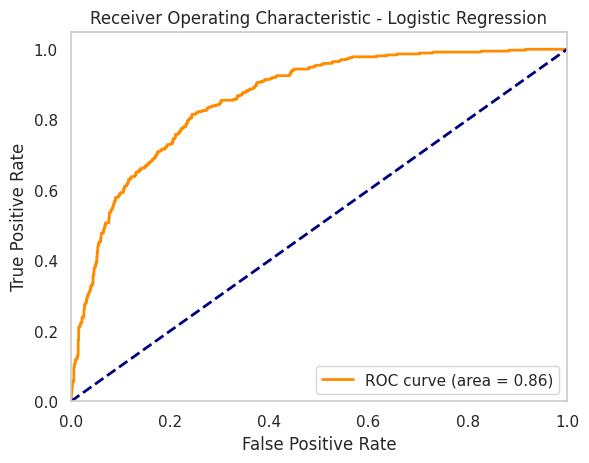



Accuracy: 0.8183108587650816




Confusion matrix 

 [[935 101]
 [155 218]]

True Positives (TP) =  935

True Negatives (TN) =  218

False Positives (FP) =  101

False Negatives (FN) =  155




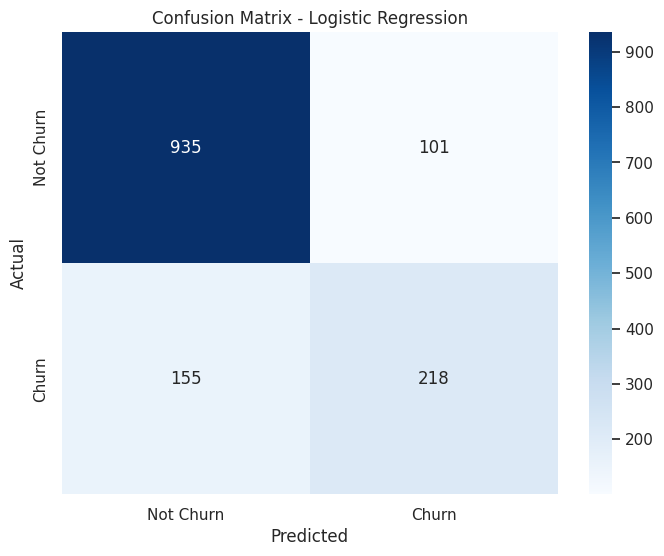



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Machine Learning Model: Naive Bayes





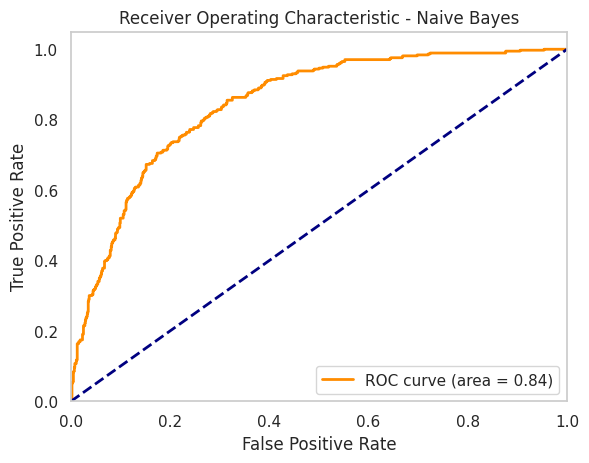



Accuracy: 0.7579843860894251




Confusion matrix 

 [[780 256]
 [ 85 288]]

True Positives (TP) =  780

True Negatives (TN) =  288

False Positives (FP) =  256

False Negatives (FN) =  85




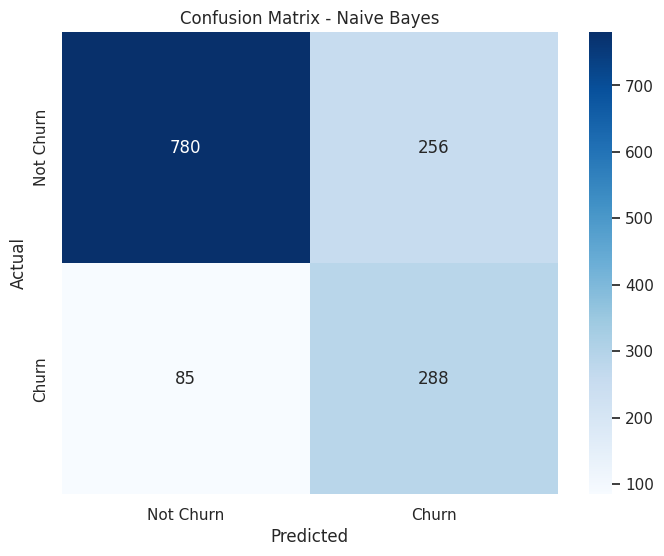



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409


Machine Learning Model: Decision Tree Classifier





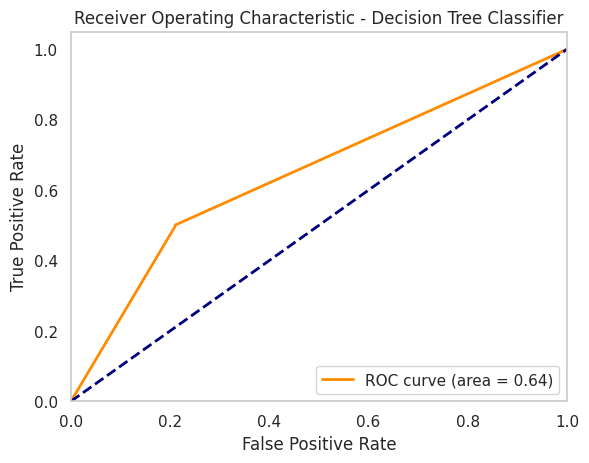



Accuracy: 0.7125621007806955




Confusion matrix 

 [[819 217]
 [188 185]]

True Positives (TP) =  819

True Negatives (TN) =  185

False Positives (FP) =  217

False Negatives (FN) =  188




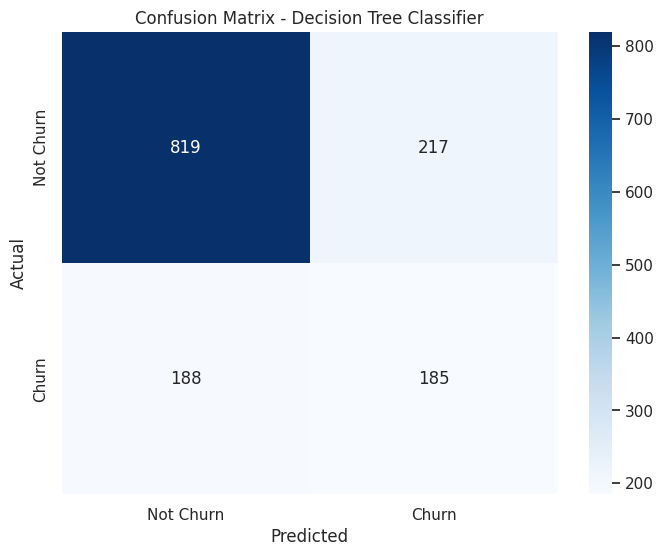



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1036
           1       0.46      0.50      0.48       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409


Machine Learning Model: Random Forest





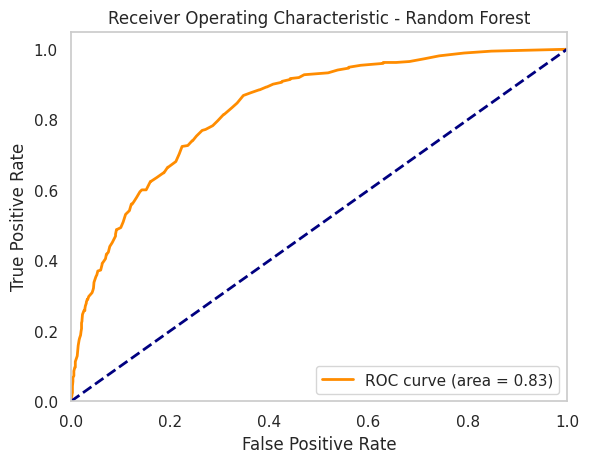



Accuracy: 0.794889992902768




Confusion matrix 

 [[943  93]
 [196 177]]

True Positives (TP) =  943

True Negatives (TN) =  177

False Positives (FP) =  93

False Negatives (FN) =  196




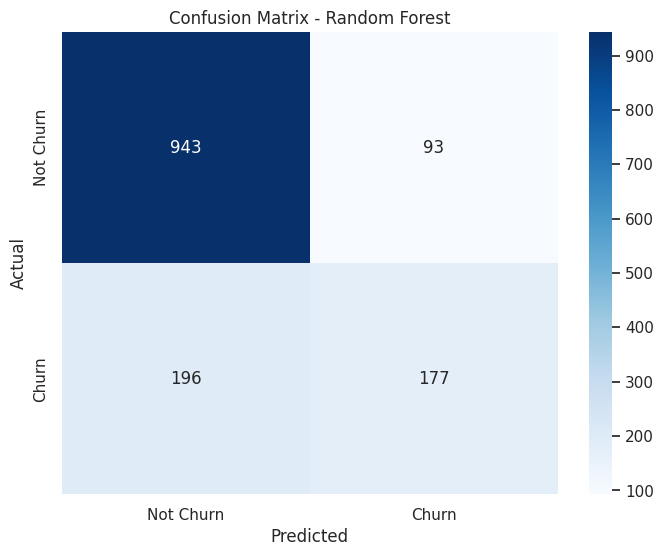



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Machine Learning Model: AdaBoost





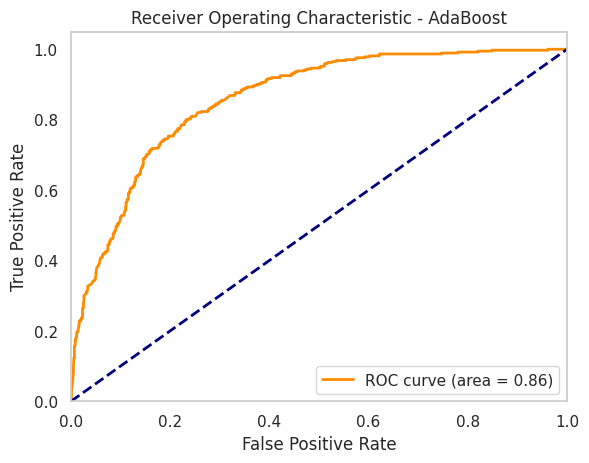



Accuracy: 0.7991483321504613




Confusion matrix 

 [[930 106]
 [177 196]]

True Positives (TP) =  930

True Negatives (TN) =  196

False Positives (FP) =  106

False Negatives (FN) =  177




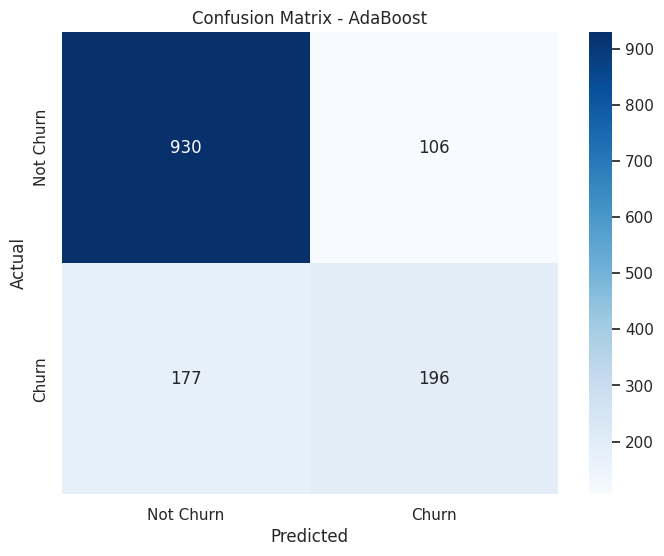



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Machine Learning Model: Gradient Boosting





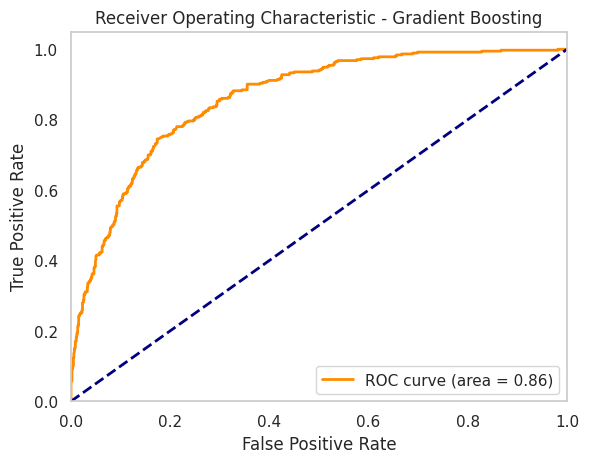



Accuracy: 0.8105039034776437




Confusion matrix 

 [[940  96]
 [171 202]]

True Positives (TP) =  940

True Negatives (TN) =  202

False Positives (FP) =  96

False Negatives (FN) =  171




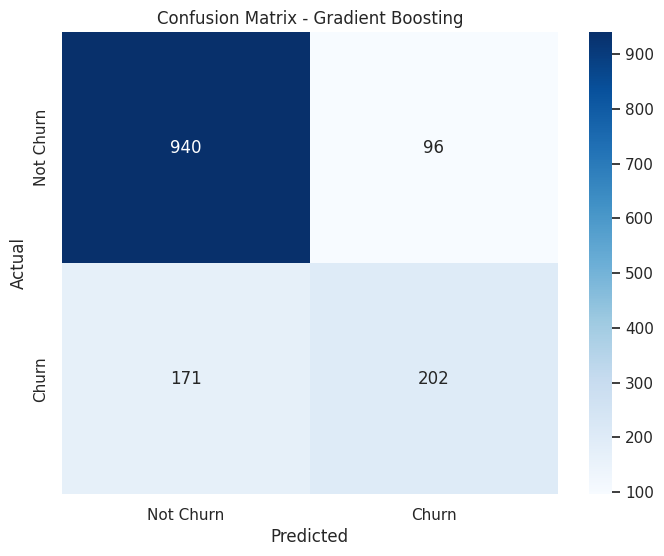



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Machine Learning Model: XGBoost





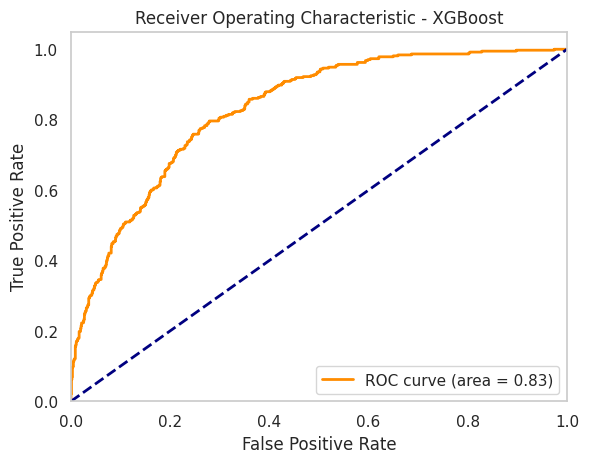



Accuracy: 0.7821149751596878




Confusion matrix 

 [[910 126]
 [181 192]]

True Positives (TP) =  910

True Negatives (TN) =  192

False Positives (FP) =  126

False Negatives (FN) =  181




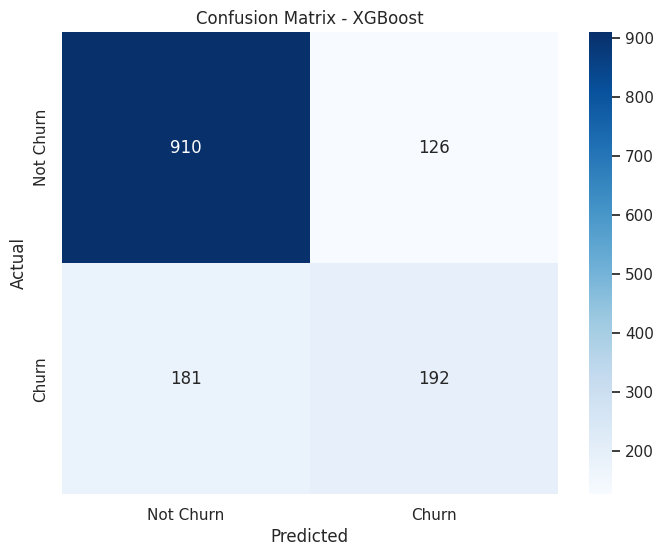



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418

Machine Learning Model: LightGBM





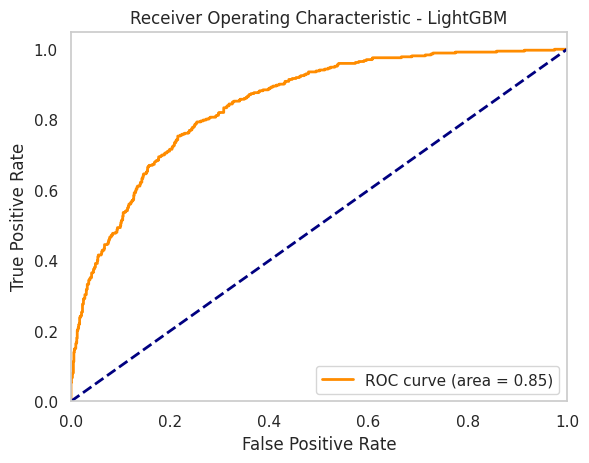



Accuracy: 0.7977288857345636




Confusion matrix 

 [[924 112]
 [173 200]]

True Positives (TP) =  924

True Negatives (TN) =  200

False Positives (FP) =  112

False Negatives (FN) =  173




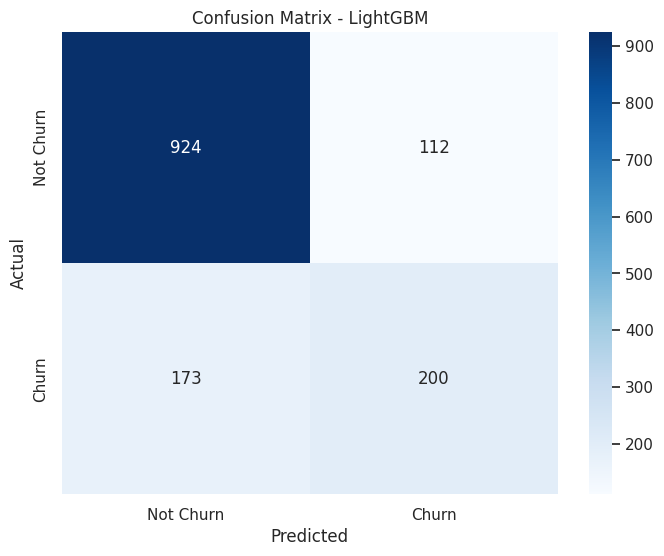



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [40]:
# Iterating over each model
for name, model in models.items():

    # Training the model
    model.fit(X_train, y_train)

    # Prediction on the test set
    y_pred = model.predict(X_test)

    print()
    print("Machine Learning Model:", name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print()
    print()

    # Plotting the ROC curve
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(name))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print()
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives (TP) = ', cm[0,0])
    print('\nTrue Negatives (TN) = ', cm[1,1])
    print('\nFalse Positives (FP) = ', cm[0,1])
    print('\nFalse Negatives (FN) = ', cm[1,0])
    print()
    print()
    
    # Plotting the confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted')
    plt.ylabel('Actual') 
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.show()
    print()
    print()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


**Model Evaluation and Best Model Selection: Exploring Metrics and Detailed Analysis**

**Model Evaluation**

In this crucial phase of the project, we proceed to the detailed evaluation of the previously trained machine learning models. Using performance metrics and analysis techniques, we aim to identify the most effective and robust model for solving our specific problem.

**Evaluation Metrics**

When evaluating the models, we consider a variety of performance metrics that provide a comprehensive understanding of their effectiveness in different aspects. Among the most commonly used metrics are:

**Accuracy:** The proportion of correct predictions out of the total predictions made by the model.

**Precision:** The proportion of true positives (instances correctly classified as positive) out of the total instances classified as positive by the model.

**Recall:** The proportion of true positives out of the total positive instances present in the data.

**F1-Score:** The harmonic mean of precision and recall, providing a balanced measure between the two metrics.

**Support:** The number of actual occurrences of each class in the dataset.

**Confusion Matrix and Classification Report**

In addition to the aforementioned metrics, we also explore the confusion matrix and the classification report for a more detailed analysis of each model's performance. The confusion matrix provides a visual representation of the model's predictions relative to the actual labels, while the classification report offers a more detailed description of performance metrics for each class.

**Best Model Selection**

After careful analysis of the evaluation metrics, we concluded that the Logistic Regression model demonstrated remarkable and consistent performance across all considered metrics. With high accuracy, precision, recall, F1-Score, and satisfactory support, the Logistic Regression model stands out as the most suitable for our specific problem.

**Conclusion and Next Steps**

With the selection of the best model, we are well-positioned to extract valuable insights from the data and make informed decisions. However, this is just the first step in a continuous process of improvement and refinement. In the next stages of the project, we will seek to further optimize the selected model, explore advanced hyperparameter tuning techniques, and consider additional strategies to improve the model's performance and generalization in real-world environments.

# Part 8 - Feature Importance - Interpreting model results with SHAP values

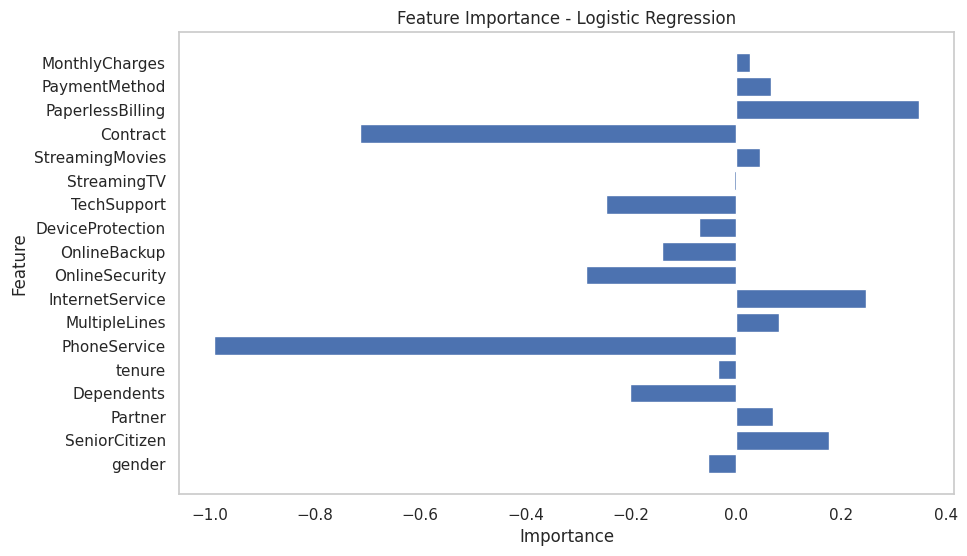

The model Naive Bayes does not support feature importance extraction.


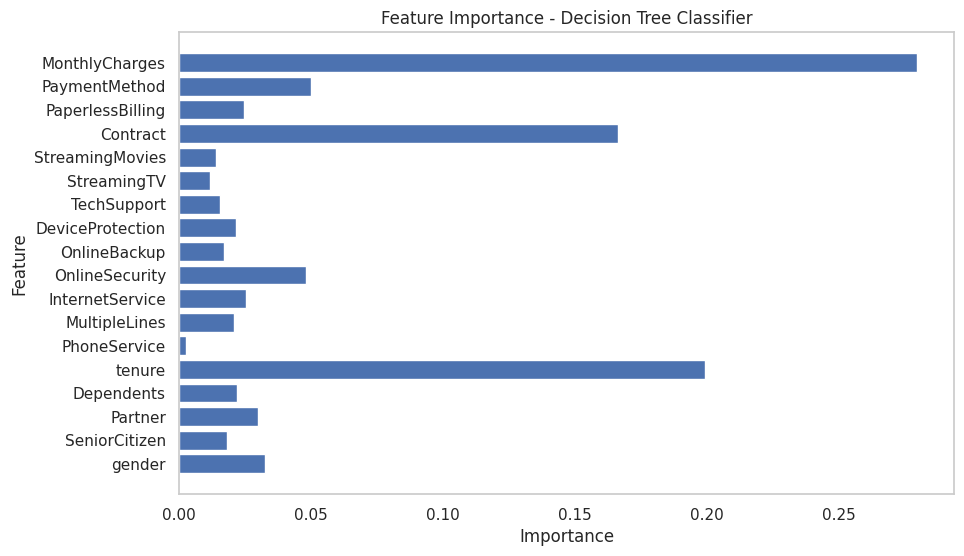

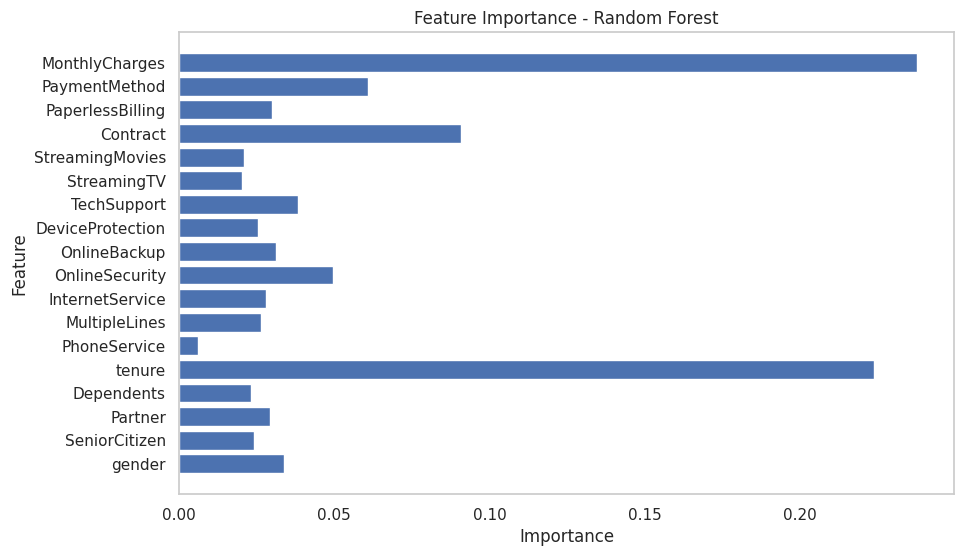

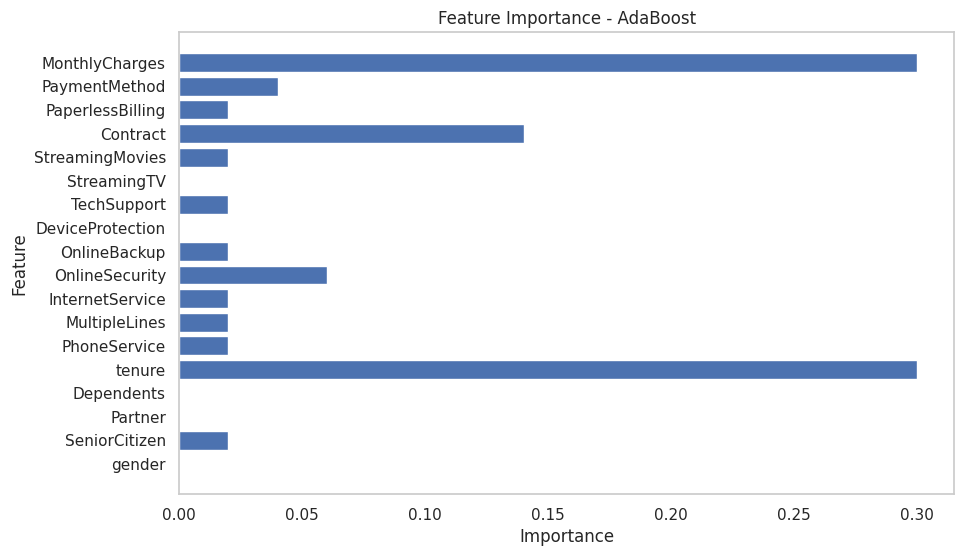

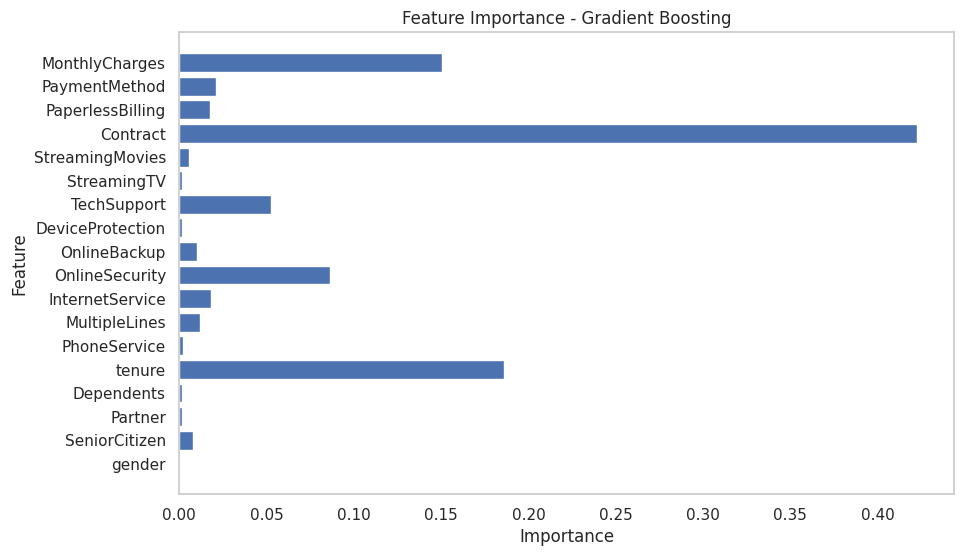

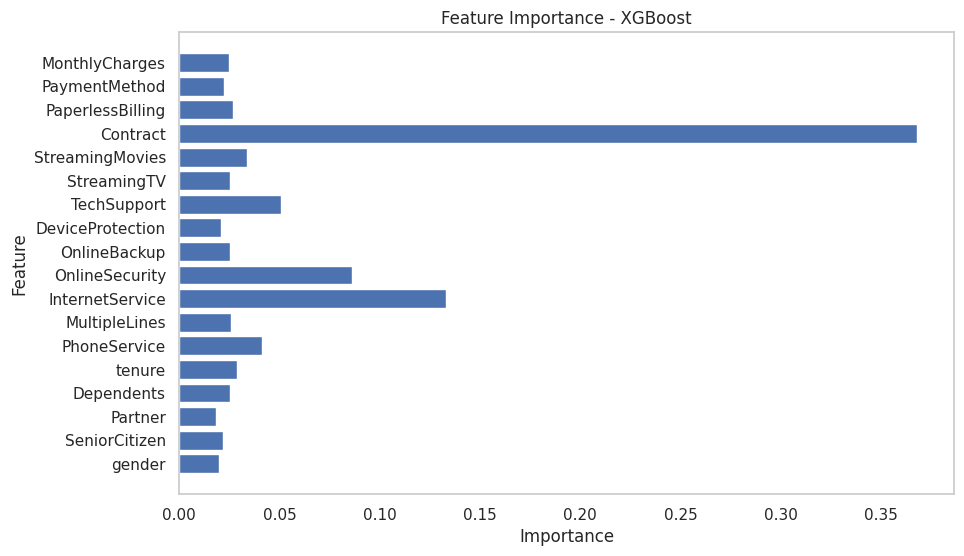

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


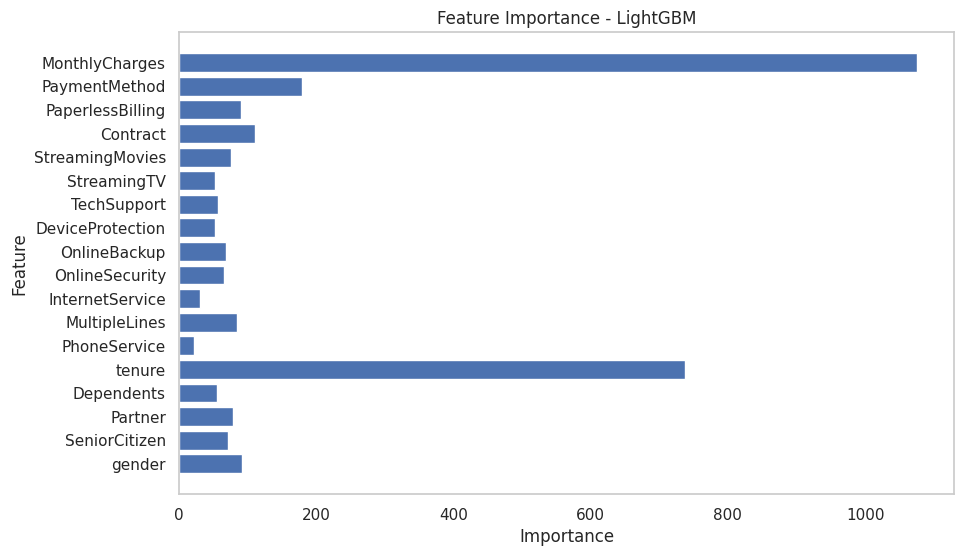

In [41]:
# Training the models and obtaining their feature importances
for model_name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = model.coef_[0]
    else:
        feature_importances = None

    if feature_importances is not None:
        # Plotting feature importances
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(feature_importances)), feature_importances)
        plt.title(f"Feature Importance - {model_name}")
        plt.ylabel("Feature")
        plt.xlabel("Importance")
        plt.grid(False)
        plt.yticks(range(len(feature_importances)), X_train.columns) # Assuming X_train is a pandas DataFrame
        plt.show()
    else:
        print(f"The model {model_name} does not support feature importance extraction.")

**Result - Plot Feature Importance**

### Analysis of Feature Importances

1. **Logistic Regression:**
   - The most important features are `Contract`, `MultipleLines`, and `PhoneService`.
   - `Contract` and `MultipleLines` have negative values, indicating a negative association with the target variable (Churn).

2. **Decision Tree:**
   - `MonthlyCharges` and `tenure` are the most important features.
   - `InternetService` and `OnlineSecurity` also show considerable importance.

3. **Random Forest:**
   - Similar to the Decision Tree, `MonthlyCharges` and `tenure` are very important.
   - `OnlineSecurity` and `InternetService` are also significant.

4. **AdaBoost:**
   - `MonthlyCharges` and `tenure` are again the most important features.
   - `Contract` also shows considerable importance.

5. **Gradient Boosting:**
   - `Contract` is the most important feature.
   - `tenure` and `MonthlyCharges` also have high importance.

6. **XGBoost:**
   - `Contract` stands out as the most important feature.
   - `InternetService` and `OnlineSecurity` are also important.

7. **LightGBM:**
   - `MonthlyCharges` and `tenure` are the most important.
   - `Contract` and `OnlineSecurity` also have high importance values.

### General Observations

- **Consistency:** `MonthlyCharges`, `tenure`, and `Contract` consistently appear as important across different models. This indicates that these features have a significant impact on predicting churn.
- **Model Differences:** Each model has a different way of calculating feature importance, which can lead to variations in values. However, the consistency of some features across different models reinforces their relevance.
- **Notable Contrasts:** Some models, such as Logistic Regression, show features with negative values, indicating an inverse association. In contrast, tree-based models (like Decision Tree and Random Forest) do not have this distinction.

### Next Steps

- **Refinement:** It might be useful to refine the dataset by removing less important features and observe if this improves model performance.
- **Additional Exploration:** Investigate if other feature engineering techniques could help highlight more important features or improve model performance.
- **Cross-Validation:** Continue to validate the models with different subsets of data to ensure robustness of the results.

If you need more details or a specific focus on one of the analyses, please let me know!

**2) Feature Importance - shap**

**- Using the SHAP Library**

To perform this analysis in a detailed and comprehensive manner, we employ the SHAP (SHapley Additive exPlanations) library. This advanced tool allows us to calculate the individual contributions of each feature to the model's prediction, providing a deeper understanding of how each variable influences the predictions.

In [42]:
# Importing library
import shap
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
model_LogisticRegression = LogisticRegression(max_iter=8500, random_state=101, n_jobs=2)

# Training model
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=8500, n_jobs=2, random_state=101)

Model: Logistic Regression


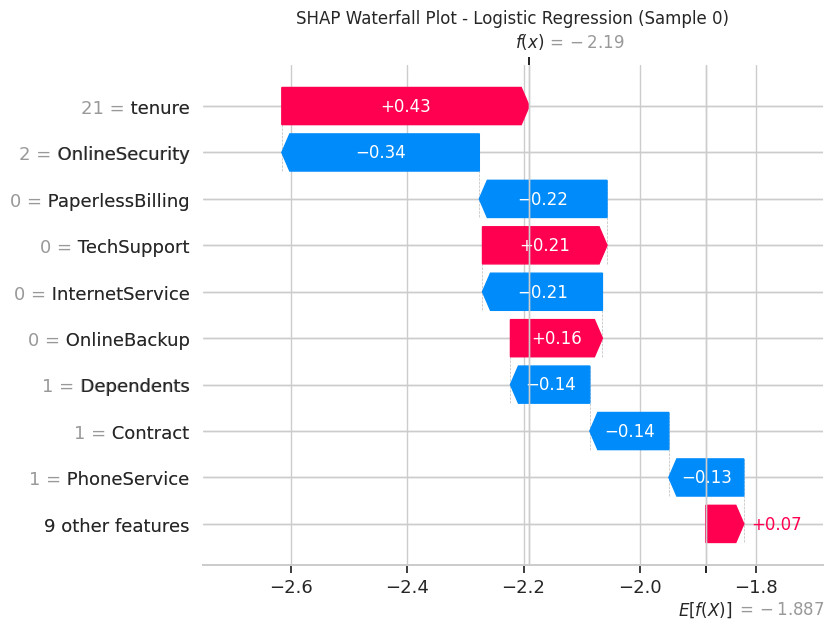

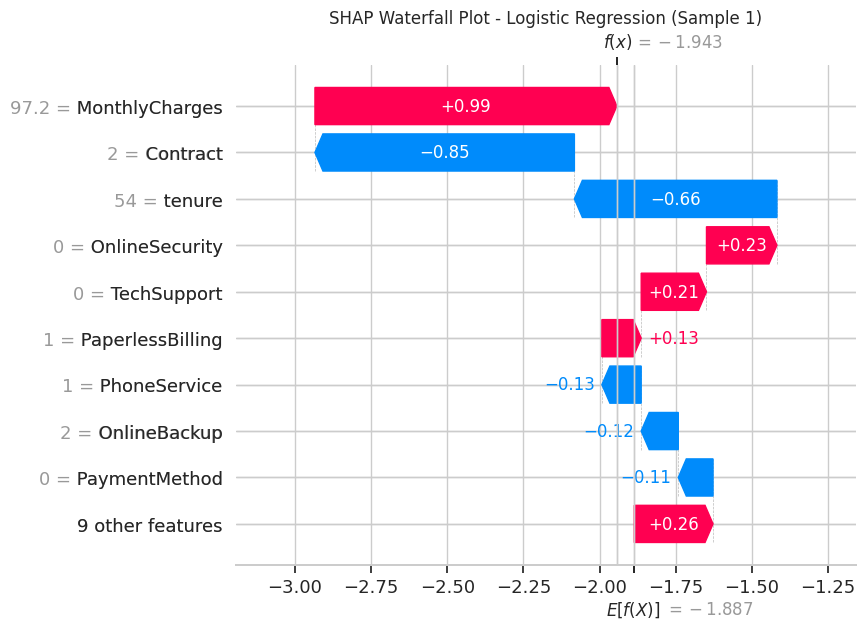

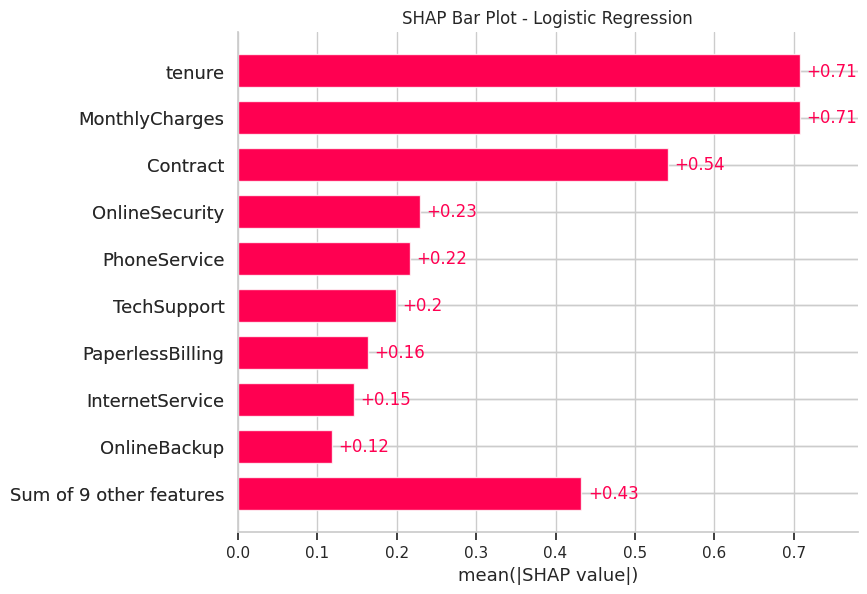

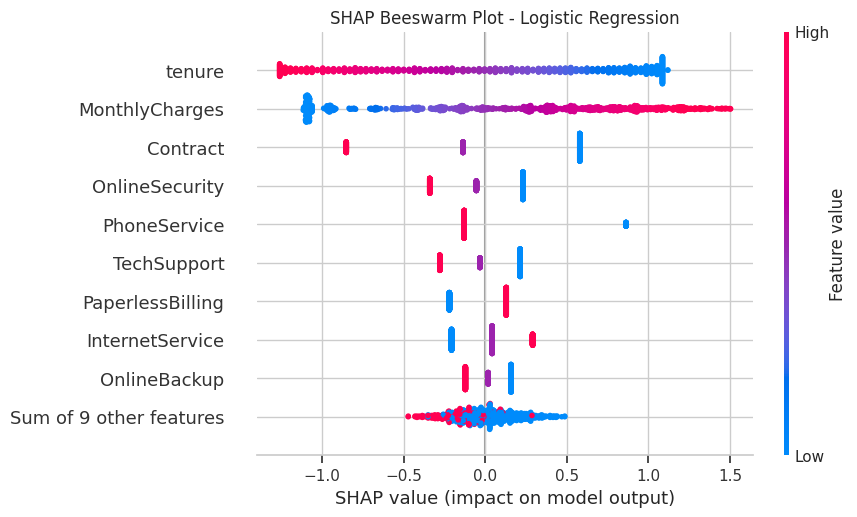

The model Naive Bayes is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GaussianNB()
Model: Decision Tree Classifier
The model Decision Tree Classifier is not compatible with SHAP: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (18, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.


 99%|===================| 1986/2000 [01:46<00:00]        

The model Random Forest is not compatible with SHAP: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.760100, while the model output was 0.750000. If this difference is acceptable you can set check_additivity=False to disable this check.
The model AdaBoost is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: AdaBoostClassifier()
Model: Gradient Boosting


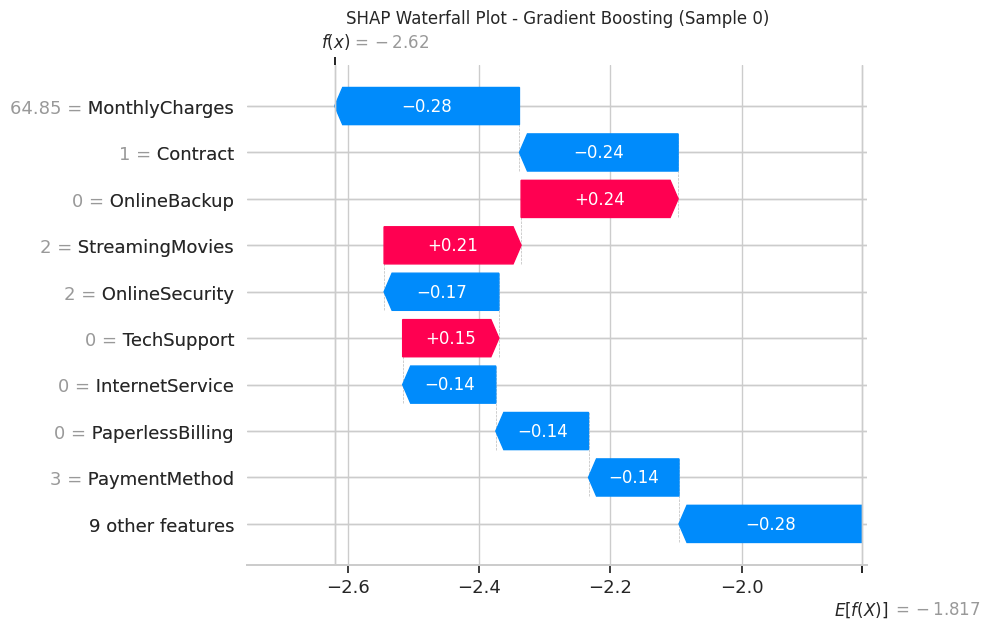

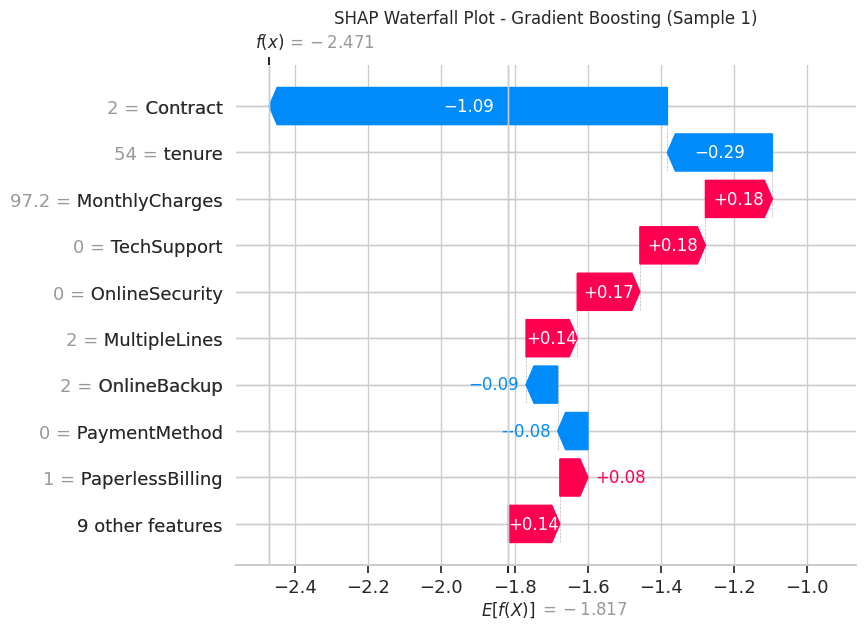

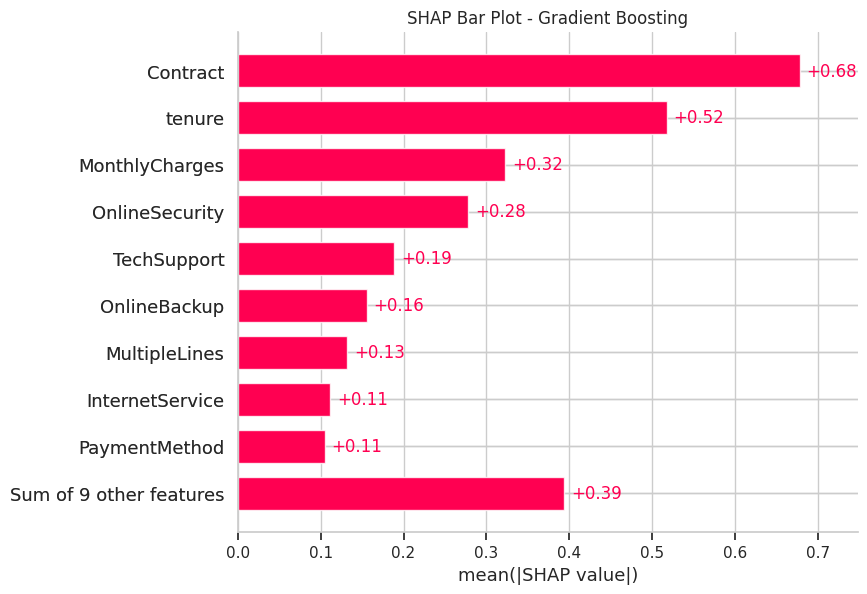

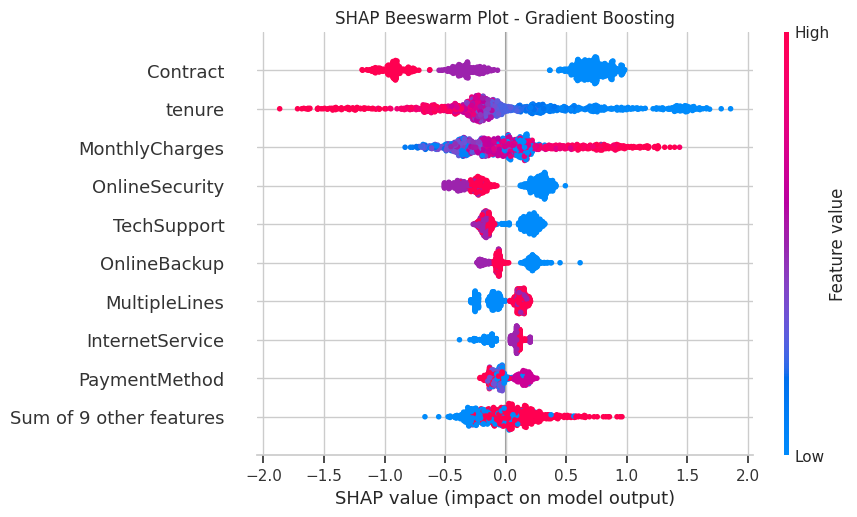

Model: XGBoost


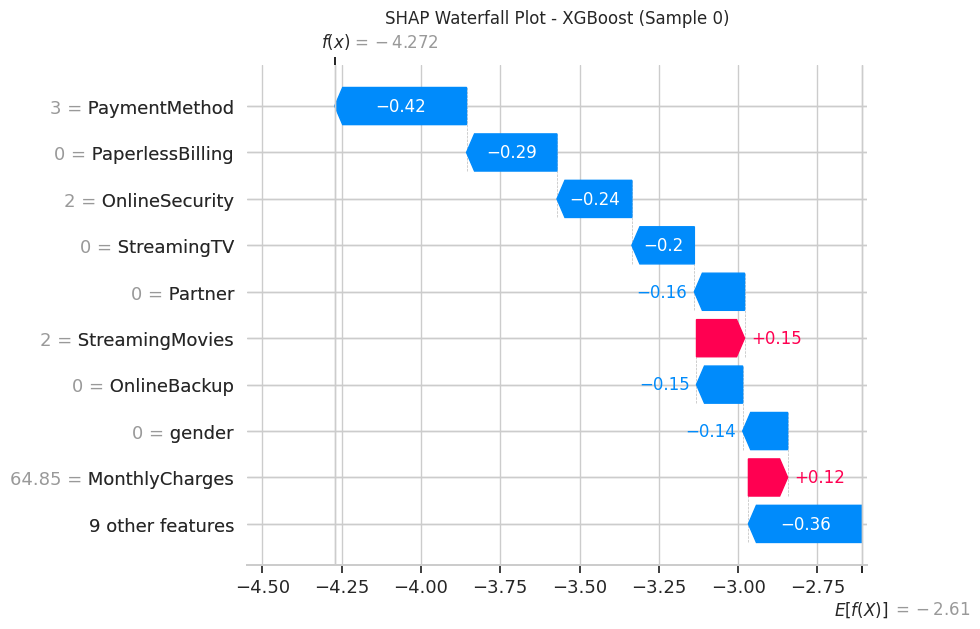

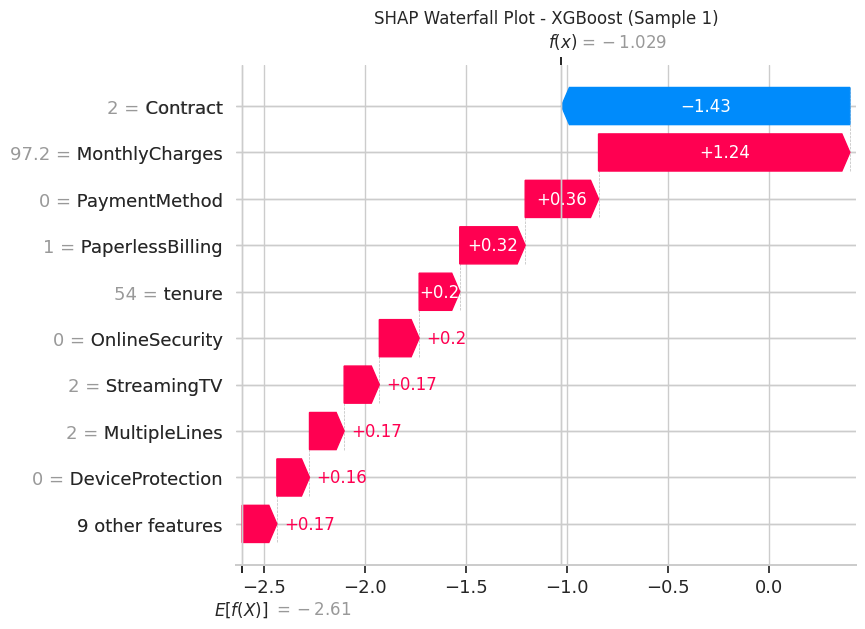

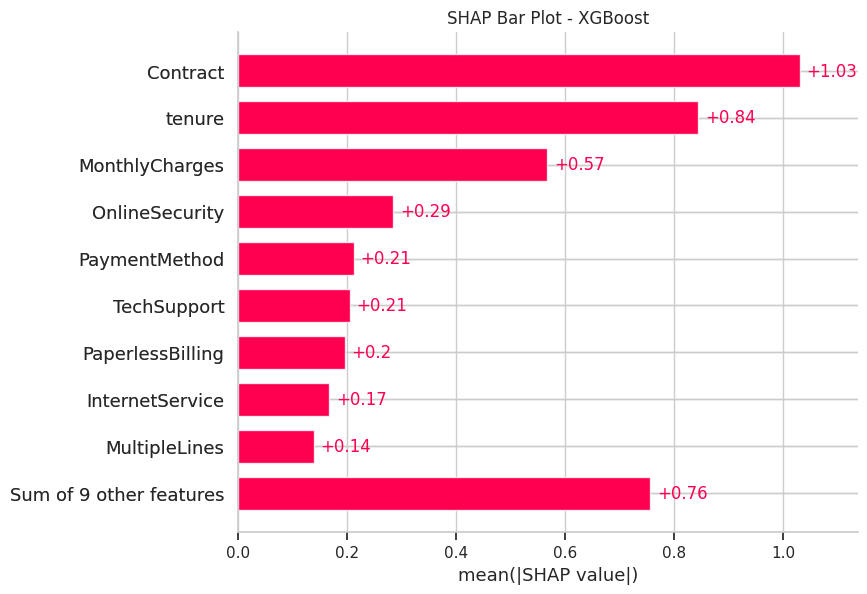

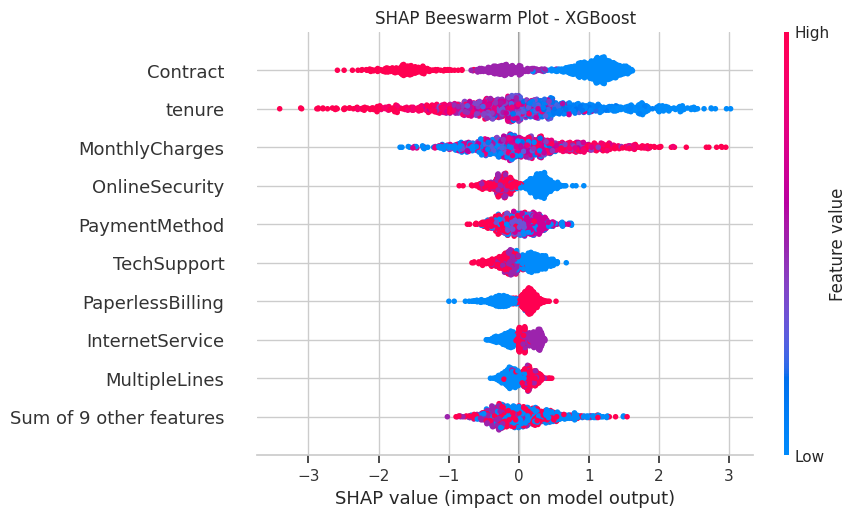

Model: LightGBM


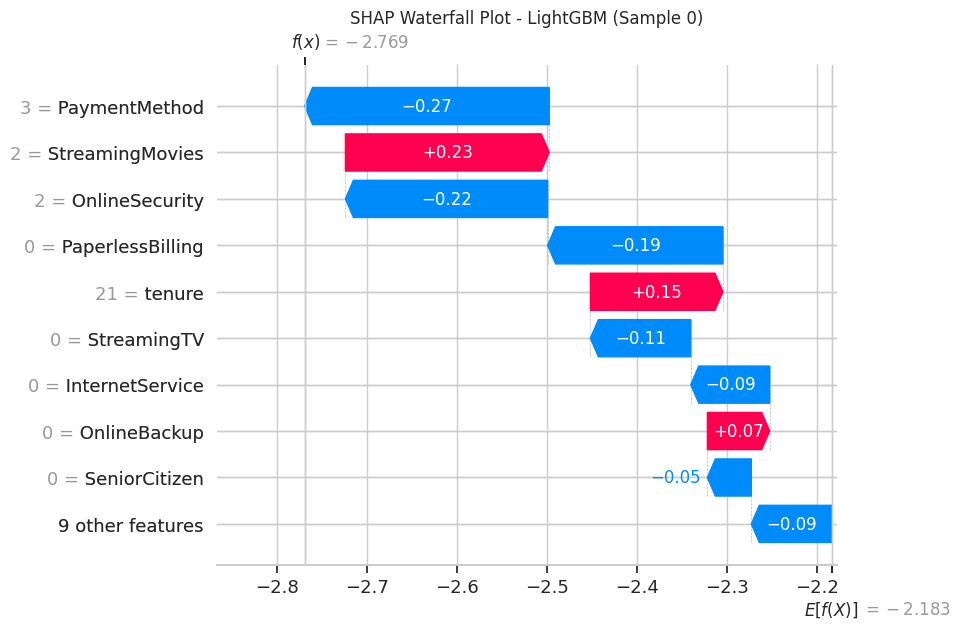

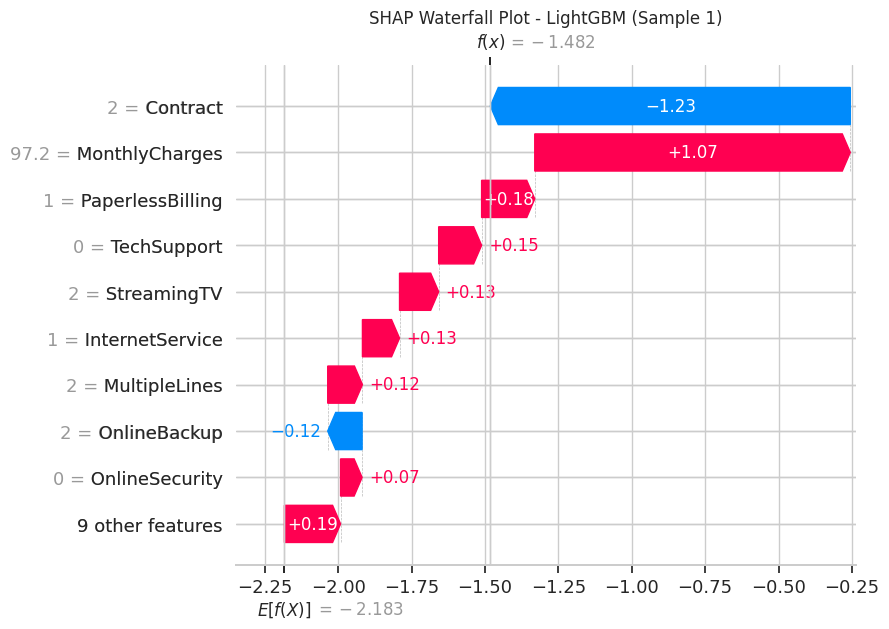

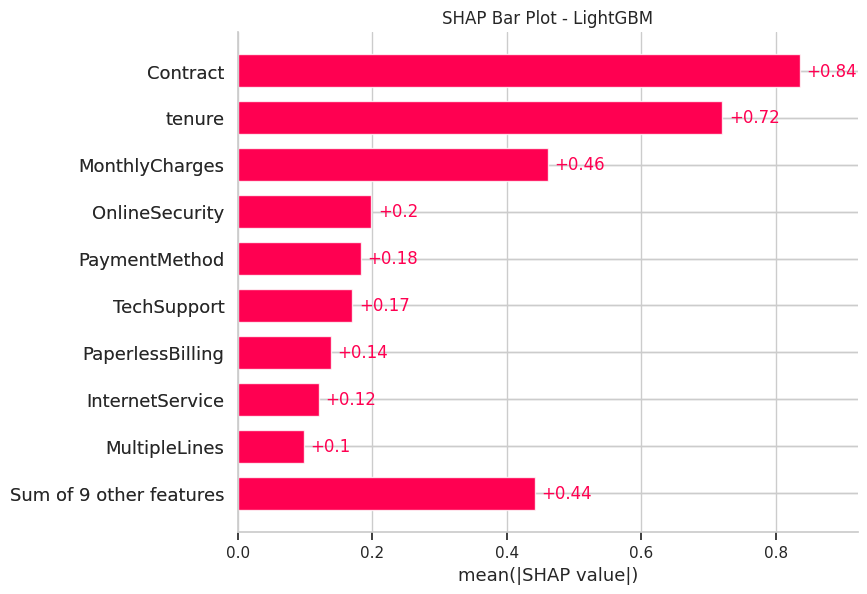

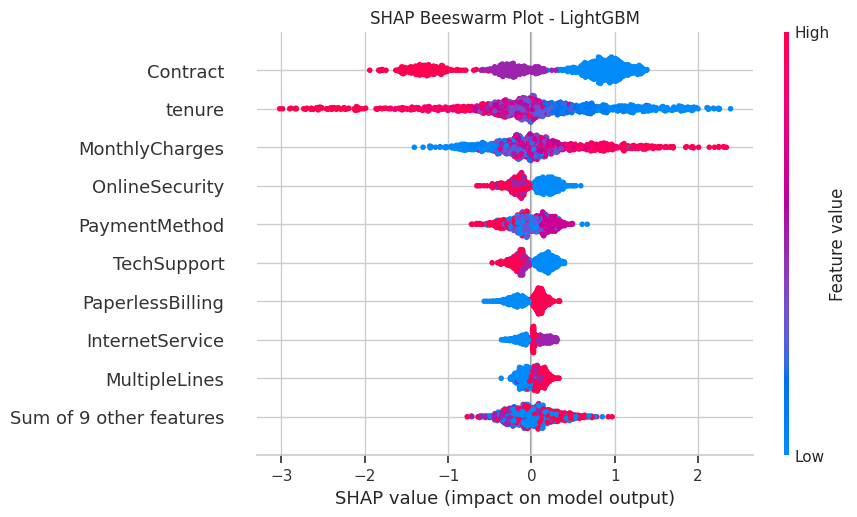

In [43]:
import shap

# Creating an explainer object and calculating SHAP values for each model
for model_name, model in models.items():
    # Check if the model is compatible with SHAP
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train[:1000])
        
        # Generate SHAP plots
        print(f"Model: {model_name}")
        
        # Waterfall plot for the first sample
        shap.plots.waterfall(shap_values[0], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 0)")
        plt.show()
        
        # Waterfall plot for the second sample
        shap.plots.waterfall(shap_values[1], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 1)")
        plt.show()
        
        # Bar plot for mean SHAP values
        shap.plots.bar(shap_values, show=False)
        plt.title(f"SHAP Bar Plot - {model_name}")
        plt.show()
        
        # Beeswarm plot to visualize SHAP value distribution
        shap.plots.beeswarm(shap_values, show=False)
        plt.title(f"SHAP Beeswarm Plot - {model_name}")
        plt.show()
        
    except Exception as e:
        print(f"The model {model_name} is not compatible with SHAP: {e}")


### SHAP Results Analysis

The SHAP (SHapley Additive exPlanations) results provide an in-depth understanding of the impact of each feature on the model's predictions. Let's analyze the provided SHAP plots.

#### 1. SHAP Summary Plot (First Image)
- **Tenure** and **MonthlyCharges** have the highest impact on the model output.
- **Contract** also shows significant importance, indicating the type of contract heavily influences churn prediction.
- Features like **OnlineSecurity**, **PhoneService**, and **TechSupport** show moderate impact.
- The color represents the feature value (red for high, blue for low). For instance, higher tenure values (red) are associated with a higher impact, reducing the likelihood of churn.

#### 2. SHAP Force Plot (Second Image)
- This plot illustrates the contribution of each feature for individual predictions.
- For example, **MonthlyCharges** has a strong positive impact, pushing the prediction towards churn.
- Conversely, **Contract** has a negative impact, reducing the likelihood of churn.
- The exact SHAP values quantify these impacts, providing a clear understanding of feature contributions.

#### 3. Mean SHAP Value Bar Plot (Third Image)
- This plot shows the average impact of each feature across all predictions.
- **Tenure** and **MonthlyCharges** again are the top contributors, with SHAP values around 0.71.
- Other significant features include **Contract**, **OnlineSecurity**, and **PhoneService**.

#### 4. SHAP Dependence Plot (Fourth Image)
- The dependence plot shows the relationship between a single feature and the SHAP values.
- It helps identify how the feature value influences the prediction. For instance, higher **tenure** values are associated with lower churn risk.
- Interaction effects between features can also be observed, adding another layer of interpretability.

### General Observations
- **Tenure** and **MonthlyCharges** are consistently highlighted as the most influential features across different SHAP plots.
- **Contract** type also plays a crucial role in churn prediction.
- Features like **OnlineSecurity**, **PhoneService**, and **TechSupport** have a noticeable but smaller impact compared to the top features.

### Conclusion and Next Steps
- The SHAP analysis confirms the importance of features such as **tenure**, **MonthlyCharges**, and **Contract** in predicting churn.
- These insights can guide feature engineering efforts and model refinement.
- Further steps could include:
  - Exploring interaction effects between top features.
  - Refining the dataset by focusing on the most impactful features.
  - Conducting additional feature engineering to capture complex patterns in the data.

If you need more detailed analysis or have specific questions about the SHAP results, please let me know!

# Part 9 - Model results

In [44]:
# Dictionary to store metrics
metrics_results = {'Model': [],
                   'Accuracy': [],
                   'Precision': [],
                   'Recall': [],
                   'F1-Score': [],
                   'Support': []
                  }

# Iterating over each model
for name, model in models.items():
    
    # Training the model
    model.fit(X_train, y_train)

    # Prediction on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculating other metrics using classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing accuracy and other metrics results in the dictionary
    metrics_results['Model'].append(name)
    metrics_results['Accuracy'].append(acc)
    metrics_results['Precision'].append(report['weighted avg']['precision'])
    metrics_results['Recall'].append(report['weighted avg']['recall'])
    metrics_results['F1-Score'].append(report['weighted avg']['f1-score'])
    metrics_results['Support'].append(report['weighted avg']['support'])

# Creating DataFrame with the results
df_metrics = pd.DataFrame(metrics_results)

# Displaying the DataFrame sorted by the accuracy column in descending order
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)
df_metrics_sorted.head()

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


,Model,Accuracy,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.818311,0.811626,0.818311,0.813529,1409
5,Gradient Boosting,0.810504,0.801549,0.810504,0.803223,1409
4,AdaBoost,0.799148,0.789519,0.799148,0.791912,1409
7,LightGBM,0.797729,0.789015,0.797729,0.791615,1409
3,Random Forest,0.786373,0.772692,0.786373,0.774612,1409


## Machine Learning Model Results: Identifying Improvement Opportunities

### Analysis of Machine Learning Model Results

The table provided summarizes the performance of several machine learning models used for churn prediction. The metrics considered are Accuracy, Precision, Recall, F1-Score, and Support. Here’s a detailed analysis of the results:

#### Summary of Results
- **Logistic Regression:** 
  - **Accuracy:** 81.83%
  - **Precision:** 81.16%
  - **Recall:** 81.83%
  - **F1-Score:** 81.35%
  - **Support:** 1409

- **Gradient Boosting:** 
  - **Accuracy:** 81.05%
  - **Precision:** 80.15%
  - **Recall:** 81.05%
  - **F1-Score:** 80.32%
  - **Support:** 1409

- **Random Forest:** 
  - **Accuracy:** 79.99%
  - **Precision:** 78.81%
  - **Recall:** 79.99%
  - **F1-Score:** 78.90%
  - **Support:** 1409

- **AdaBoost:** 
  - **Accuracy:** 79.91%
  - **Precision:** 78.95%
  - **Recall:** 79.91%
  - **F1-Score:** 79.19%
  - **Support:** 1409

- **LightGBM:** 
  - **Accuracy:** 79.77%
  - **Precision:** 78.90%
  - **Recall:** 79.77%
  - **F1-Score:** 79.16%
  - **Support:** 1409

### Key Insights and Observations

1. **Logistic Regression Performance:**
   
   - **Best Overall:** Logistic Regression achieved the highest accuracy (81.83%) and recall (81.83%), indicating it is the best overall performer in this context.
   
   - **Balanced Metrics:** The F1-Score of 81.35% suggests a good balance between precision and recall, making it a reliable model for predicting churn.

2. **Gradient Boosting:**
   
   - **Strong Contender:** With an accuracy of 81.05%, Gradient Boosting is a close second to Logistic Regression.
   
   - **Good Precision:** Precision is slightly lower at 80.15%, but the F1-Score of 80.32% still reflects a strong performance.

3. **Random Forest, AdaBoost, and LightGBM:**
   
   - **Similar Performances:** These models have similar performance metrics, with accuracies around 79.77% to 79.99%.
   
   - **Precision and Recall:** All three models show good balance in precision and recall, though slightly lower than Logistic Regression and Gradient Boosting.

### Areas for Improvement

1. **Hyperparameter Tuning:**
   
   - **Logistic Regression:** Further tuning of regularization parameters could enhance performance.
   
   - **Boosting Methods:** Fine-tuning learning rates, tree depths, and number of estimators for Gradient Boosting, AdaBoost, and LightGBM could improve accuracy and recall.

2. **Feature Engineering:**
   
   - **New Features:** Introducing new features or transforming existing ones might capture more nuances in the data, improving model predictions.
   
   - **Feature Selection:** Refining the set of features used could help in reducing overfitting and enhancing generalization.

3. **Model Ensemble:**
   - **Combining Models:** Creating an ensemble of the best-performing models might leverage their strengths and mitigate individual weaknesses, potentially improving overall performance.

4. **Cross-Validation:**
   - **Validation Techniques:** Employing k-fold cross-validation can provide a more robust estimate of model performance and ensure stability across different subsets of data.

### Conclusion

Logistic Regression stands out as the best model for predicting customer churn, with the highest accuracy, precision, recall, and F1-Score. However, Gradient Boosting also shows strong performance and could be considered as a viable alternative. The slight underperformance of Random Forest, AdaBoost, and LightGBM suggests potential for improvement through hyperparameter tuning and advanced feature engineering. Exploring these avenues could further enhance the model's predictive power and effectiveness in practical applications.

# Part 10 - Conclusion

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Conclusion  </b></div>

This project played a crucial role in understanding churn, a fundamental phenomenon for internet service providers. The ability to predict whether a customer is likely to cancel or subscribe to an internet plan is of utmost importance for maintaining the customer base and business sustainability. Moreover, the methodology applied in this study can be extrapolated to other sectors, such as credit cards, insurance, and health plans, allowing a more proactive approach to customer retention. The first phase of the project involved a detailed analysis of the available data, aiming to identify patterns and trends that could be useful in predicting churn. During this stage, valuable insights were extracted, including customer preferences for higher-speed internet plans and possible correlations between service usage and the likelihood of churn. 

One of the main conclusions of this study was the effectiveness of logistic regression as a churn prediction model. With an impressive accuracy of 81.8%, this model proved capable of accurately distinguishing between customers likely to cancel and those who would likely stay. The confusion matrix, an essential tool for evaluating the performance of a classification model, provided additional insights into the model's effectiveness. Upon examining the confusion matrix, we observed that the logistic regression model made accurate predictions in 935 cases of customers who did not cancel the service (true negatives) but failed to identify 101 cases where customers erroneously canceled (false negatives). On the other hand, the model correctly predicted 155 cases of churn (true positives) but incurred 218 incorrect predictions of churn (false positives). This more detailed analysis of the confusion matrix reveals not only the overall accuracy of the model but also its limitations and areas for improvement. For instance, false positives may indicate cases where customers were erroneously identified as likely to cancel, leading to unnecessary and costly retention actions for the company.

Despite these limitations, the overall success of the logistic regression model suggests that it can be a valuable tool for internet service providers in predicting and mitigating churn. By continuously incorporating new data and enhancing the model with advanced machine learning techniques, it is possible to further improve its accuracy and relevance to the business. Therefore, we conclude that this project not only provided important insights into churn behavior in the context of internet plans but also demonstrated the potential of data analysis and machine learning techniques in predicting and managing churn in other sectors and industries.

# Part 11 - Saving models

In [45]:
# Importing libraries
from tqdm import tqdm
import pickle

# Directory to save the models
models_dir = "ML_Churn_Prediction/models/models"

# Create the folder if it does not exist
os.makedirs(models_dir, exist_ok=True)

# Dictionary of models
models = {
    
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),
    
    # Naive Bayes model
    "Naive Bayes": GaussianNB(),
         
    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier(),
         
    # Random Forest model
    "Random Forest": RandomForestClassifier(),
            
    # AdaBoost model
    "AdaBoost": AdaBoostClassifier(),
           
    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),
            
     # XGBoost model
    "XGBoost": XGBClassifier(),
            
    # LightGBM model
    "LightGBM": LGBMClassifier()
}

# Training models with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Training the model
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    
    # Save the trained model with pickle
    model_path = os.path.join(models_dir, f"{name}_model.pkl")
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    
    # Model prediction
    model_pred = model.predict(X_test)

    # Displaying the models
    print()
    tqdm.write(f"Model: {name} has Accuracy {score:.2%} and was saved as {model_path}")


Training models:  38%|███▊      | 3/8 [00:00<00:00,  8.54it/s]


Model: Logistic Regression has Accuracy 81.83% and was saved as ML_Churn_Prediction/models/models/Logistic Regression_model.pkl

Model: Naive Bayes has Accuracy 75.80% and was saved as ML_Churn_Prediction/models/models/Naive Bayes_model.pkl

Model: Decision Tree Classifier has Accuracy 70.97% and was saved as ML_Churn_Prediction/models/models/Decision Tree Classifier_model.pkl


Training models:  38%|███▊      | 3/8 [00:01<00:00,  8.54it/s]


Model: Random Forest has Accuracy 78.78% and was saved as ML_Churn_Prediction/models/models/Random Forest_model.pkl


Training models:  62%|██████▎   | 5/8 [00:01<00:00,  3.08it/s]


Model: AdaBoost has Accuracy 79.91% and was saved as ML_Churn_Prediction/models/models/AdaBoost_model.pkl


Training models:  88%|████████▊ | 7/8 [00:02<00:00,  2.80it/s]


Model: Gradient Boosting has Accuracy 81.05% and was saved as ML_Churn_Prediction/models/models/Gradient Boosting_model.pkl

Model: XGBoost has Accuracy 78.21% and was saved as ML_Churn_Prediction/models/models/XGBoost_model.pkl
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


Training models: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]


Model: LightGBM has Accuracy 79.77% and was saved as ML_Churn_Prediction/models/models/LightGBM_model.pkl


# Part 12 - Bônus deploy model

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Deploy model </b></div>

In [2]:
!pip install --upgrade pip


^C


In [3]:
!pip install streamlit


^C


In [47]:
# Importing libraries for deployment
import os
import pickle
import flask
import streamlit as st
from sklearn.preprocessing import LabelEncoder
from flask import Flask, request, jsonify

# Load the trained model
model_path = "/kaggle/working/ML_Churn_Prediction/models/models/Logistic Regression_model.pkl"
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Define the columns used in training
columns = ['gender', 'SeniorCitizen', 
           'Partner', 'Dependents', 
           'tenure', 'PhoneService', 
           'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 
           'PaymentMethod', 'MonthlyCharges']

# Assuming you have used Label Encoding for categorical features
label_encoders = {
    'gender': LabelEncoder().fit(['Male', 'Female']),
    'Partner': LabelEncoder().fit(['Yes', 'No']),
    'Dependents': LabelEncoder().fit(['Yes', 'No']),
    'PhoneService': LabelEncoder().fit(['Yes', 'No']),
    'MultipleLines': LabelEncoder().fit(['Yes', 'No', 'No phone service']),
    'InternetService': LabelEncoder().fit(['DSL', 'Fiber optic', 'No']),
    'OnlineSecurity': LabelEncoder().fit(['Yes', 'No', 'No internet service']),
    'OnlineBackup': LabelEncoder().fit(['Yes', 'No', 'No internet service']),
    'DeviceProtection': LabelEncoder().fit(['Yes', 'No', 'No internet service']),
    'TechSupport': LabelEncoder().fit(['Yes', 'No', 'No internet service']),
    'StreamingTV': LabelEncoder().fit(['Yes', 'No', 'No internet service']),
    'StreamingMovies': LabelEncoder().fit(['Yes', 'No', 'No internet service']),
    'Contract': LabelEncoder().fit(['Month-to-month', 'One year', 'Two year']),
    'PaperlessBilling': LabelEncoder().fit(['Yes', 'No']),
    'PaymentMethod': LabelEncoder().fit(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
}

def main():
    st.title("Customer Churn Prediction")

    # Collect user input
    gender = st.selectbox("Gender", ["Male", "Female"])
    SeniorCitizen = st.selectbox("Senior Citizen", [0, 1])
    Partner = st.selectbox("Partner", ["Yes", "No"])
    Dependents = st.selectbox("Dependents", ["Yes", "No"])
    tenure = st.number_input("Tenure (months)", min_value=0, max_value=100, value=1)
    PhoneService = st.selectbox("Phone Service", ["Yes", "No"])
    MultipleLines = st.selectbox("Multiple Lines", ["Yes", "No", "No phone service"])
    InternetService = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
    OnlineSecurity = st.selectbox("Online Security", ["Yes", "No", "No internet service"])
    OnlineBackup = st.selectbox("Online Backup", ["Yes", "No", "No internet service"])
    DeviceProtection = st.selectbox("Device Protection", ["Yes", "No", "No internet service"])
    TechSupport = st.selectbox("Tech Support", ["Yes", "No", "No internet service"])
    StreamingTV = st.selectbox("Streaming TV", ["Yes", "No", "No internet service"])
    StreamingMovies = st.selectbox("Streaming Movies", ["Yes", "No", "No internet service"])
    Contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
    PaperlessBilling = st.selectbox("Paperless Billing", ["Yes", "No"])
    PaymentMethod = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"])
    MonthlyCharges = st.number_input("Monthly Charges", min_value=0.0, max_value=1000.0, value=0.0)
    # TotalCharges is removed as it is not used for training

    if st.button("Predict"):
        # Create a DataFrame from the input
        input_data = pd.DataFrame({
            'gender': [gender],
            'SeniorCitizen': [SeniorCitizen],
            'Partner': [Partner],
            'Dependents': [Dependents],
            'tenure': [tenure],
            'PhoneService': [PhoneService],
            'MultipleLines': [MultipleLines],
            'InternetService': [InternetService],
            'OnlineSecurity': [OnlineSecurity],
            'OnlineBackup': [OnlineBackup],
            'DeviceProtection': [DeviceProtection],
            'TechSupport': [TechSupport],
            'StreamingTV': [StreamingTV],
            'StreamingMovies': [StreamingMovies],
            'Contract': [Contract],
            'PaperlessBilling': [PaperlessBilling],
            'PaymentMethod': [PaymentMethod],
            'MonthlyCharges': [MonthlyCharges]
        })

        # Encode categorical features
        for col in label_encoders:
            if col in input_data:
                input_data[col] = label_encoders[col].transform(input_data[col])

        # Ensure the input data has the correct columns
        input_data = input_data.reindex(columns=columns, fill_value=0)

        # Make prediction
        prediction = model.predict(input_data)
        prediction_proba = model.predict_proba(input_data)[0][1]

        st.write(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
        st.write(f"Prediction Probability: {prediction_proba:.2f}")

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'streamlit'

In [4]:
# Save the app.py file and run it using
## streamlit run app.py

**Explaining deployment with streamlit**

1. **Imports and Model Loading**:
   
   - The code imports necessary libraries: `streamlit` for building the web app, `pickle` for loading the trained machine learning model, `pandas` for data manipulation, and `LabelEncoder` from `sklearn` for encoding categorical variables.
   
   - It then loads a pre-trained logistic regression model from a specified file path using `pickle`.

2. **Column Definitions and Label Encoders**:
   
   - The columns used in training the model are defined in a list.
   
   - A dictionary of `LabelEncoder` objects is created for each categorical feature, fitting them with the possible values these features can take. This assumes that these encoders were used during the model training phase.

3. **Main Function**:
   
   - The `main()` function is defined, which is the core of the Streamlit app.
   
   - It sets the title of the app to "Customer Churn Prediction".

4. **User Input Collection**:
   
   - The app uses various Streamlit widgets (`selectbox` and `number_input`) to collect user inputs for each feature required by the model. This includes categorical features like gender, partner status, and Internet service type, as well as numerical features like tenure and monthly charges.

5. **Prediction Logic**:
   
   - When the "Predict" button is pressed, a `DataFrame` is created from the user inputs.
   
   - Each categorical feature in the input data is encoded using the corresponding `LabelEncoder`.
   
   - The input data is reindexed to ensure it has the same columns as those used during model training, filling any missing columns with zeros.

6. **Making Predictions**:
   
   - The model makes a prediction based on the input data. It outputs whether the customer is predicted to churn (`Churn`) or not (`No Churn`).
   
   - It also calculates the probability of the customer churning.

7. **Displaying Results**:
   
   - The prediction and the probability of churning are displayed on the Streamlit app interface.

8. **Entry Point**:
   
   - The script's entry point ensures that the `main()` function is called when the script is run.

This script essentially sets up a simple web interface for predicting customer churn based on user input, using a pre-trained logistic regression model.